#### Note

In [ ]:
# pd.set_option('display.max_rows', 100) # 최대 display option set
# pd.reset_option('display.max_rows') # 최대 display option reset

# from datetime import timedelta
# datetime.datetime(2019,12,31) - datetime.datetime(2008,1,1)

#### IMPORT

In [2]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#### 08-19 OHCA 합치기

In [3]:
# ohca_08 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_08.sas7bdat', encoding = 'euc-kr')
# ohca_09 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_09.sas7bdat', encoding = 'euc-kr')
# ohca_10 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_10.sas7bdat', encoding = 'euc-kr')
# ohca_11 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_11.sas7bdat', encoding = 'euc-kr')
# ohca_12 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_12.sas7bdat', encoding = 'euc-kr')
# ohca_13 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_13.sas7bdat', encoding = 'euc-kr')
# ohca_14 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_14.sas7bdat', encoding = 'euc-kr')
# ohca_16 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_16.sas7bdat', encoding = 'euc-kr')
# ohca_17 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_17.sas7bdat', encoding = 'euc-kr')
# ohca_18 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_18.sas7bdat', encoding = 'euc-kr')
# ohca_19 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_19.sas7bdat', encoding = 'euc-kr')

In [4]:
# ohca_15 = pd.read_table('data\\급성심장정지조사(08-19)SAS\\ohca_15.txt', encoding = 'utf-8', sep='\t')

In [ ]:
# ohca_15

In [5]:
# ohca_all = pd.concat([ohca_08, ohca_09, ohca_10, ohca_11, ohca_12, ohca_13, ohca_14, ohca_15, ohca_16, ohca_17, ohca_18, ohca_19], axis = 0)
# ohca_all.reset_index(drop = True, inplace = True)
# ohca_all

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,OP8_PRE_VITAL_PR,OP8_PRE_VITAL_RR,OP8_PRE_VITAL_BT,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED
0,1.0,2008,11410,서울,서대문구,11680,서울,강남구,1,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2008,11320,서울,도봉구,11305,서울,강북구,2,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2008,11110,서울,종로구,11440,서울,마포구,2,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2008,11590,서울,동작구,11590,서울,동작구,2,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2008,11560,서울,영등포구,11560,서울,영등포구,1,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110,세종,세종시,36110,세종,세종시,1,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324127,30276.0,2019,43112,충북,청주시 서원구,44230,충남,논산시,1,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324128,30277.0,2019,36110,세종,세종시,36110,세종,세종시,2,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324129,30278.0,2019,36110,세종,세종시,36110,세종,세종시,2,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# ohca_all.to_csv('data\\급성심장정지조사(08-19)SAS\\ohca_all.csv', encoding = 'euc-kr', index = False)

#### 08-19 합친 ohca_all 다시 불러오기

In [173]:
ohca_all = pd.read_csv('0. data\\급성심장정지조사(08-19)SAS\\ohca_all.csv', encoding = 'euc-kr', low_memory = False)
ohca_all

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,OP8_PRE_VITAL_PR,OP8_PRE_VITAL_RR,OP8_PRE_VITAL_BT,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED
0,1.0,2008,11410.0,서울,서대문구,11680.0,서울,강남구,1,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2008,11320.0,서울,도봉구,11305.0,서울,강북구,2,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2008,11110.0,서울,종로구,11440.0,서울,마포구,2,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2008,11590.0,서울,동작구,11590.0,서울,동작구,2,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2008,11560.0,서울,영등포구,11560.0,서울,영등포구,1,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,1,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324127,30276.0,2019,43112.0,충북,청주시 서원구,44230.0,충남,논산시,1,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324128,30277.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324129,30278.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 과천, 마포 check

In [ ]:
check = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\ohca_all.csv', encoding = 'euc-kr', low_memory = False)

In [ ]:
check.loc[check['P_ADD_DIST'].str.contains('마포')]

In [ ]:
check.loc[check['P_ADMINCODE'] == 11440.0]

##### 질병, 질병 외 check

In [ ]:
check['CAUSE'].value_counts()

In [ ]:
check['CAUSE_DISEASE'].value_counts()

##### 성남시 중원구 check
ADMINCODE 41133

In [ ]:
ohca_all.loc[ohca_all['P_ADD_DIST'].str.contains('중원')]

##### ADD_CITY, ADD_DIST 합치기

In [174]:
ohca_all['H_ADD_CITY_DIST'] = ohca_all['H_ADD_CITY'] + ' ' + ohca_all['H_ADD_DIST']
ohca_all['P_ADD_CITY_DIST'] = ohca_all['P_ADD_CITY'] + ' ' + ohca_all['P_ADD_DIST']

##### AGE, SEX, 기저질환군별 check

In [175]:
ohca_all['H_SEX'].value_counts()

1    208520
2    115611
Name: H_SEX, dtype: int64

In [176]:
group_age = ohca_all.groupby(ohca_all['AGE'] // 10)
group_age = pd.DataFrame(group_age.size().reset_index(name='count'))
group_age

,AGE,count
0,0.0,4583
1,1.0,4722
2,2.0,9777
3,3.0,15927
4,4.0,32577
5,5.0,51000
6,6.0,53825
7,7.0,76403
8,8.0,60067
9,9.0,14629


(0.0, 11.0)

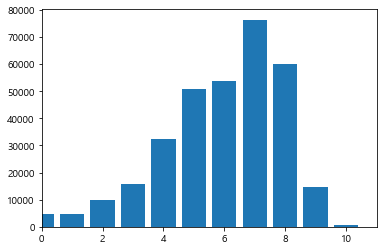

In [177]:
plt.bar(group_age['AGE'], group_age['count'])
plt.xlim([0, 11])

In [178]:
# # ohca_all.loc[ohca_all['AGE'] >= 70, 'AGE'].count()   # 151720
# # ohca_all['AGE'].between(60, 70, inclusive=True).sum()  # 60721
# ohca_all['AGE'].between(50, 60, inclusive=True).sum()  # 56318

In [179]:
# 70세로 끊자 

ohca_all.loc[ohca_all['AGE'] >= 70, 'above70'] = 1
ohca_all.loc[ohca_all['AGE'] < 70, 'above70'] = 0

In [180]:
ohca_all['above70'].value_counts()

0.0    172411
1.0    151720
Name: above70, dtype: int64

In [181]:
# 과거력 - 고혈압
# 1 - 있음, 2 - 없음, 9 - 미상

ohca_all['PHX_HTN'].value_counts()

9.0    166620
1.0     77964
2.0     59456
Name: PHX_HTN, dtype: int64

In [182]:
# 과거력 - 당뇨병
# 1 - 있음, 2 - 없음, 9 - 미상

ohca_all['PHX_DM'].value_counts()

9.0    183672
2.0     69721
1.0     50647
Name: PHX_DM, dtype: int64

In [183]:
# 과거력 - 심장질환
# 1 - 있음, 2 - 없음, 9 - 미상

ohca_all['PHX_HEART'].value_counts()

9.0    211672
2.0     57900
1.0     34468
Name: PHX_HEART, dtype: int64

In [184]:
# 2008년 제외하고 medical_history 생성
# 미상이 너무 많다 .. 이렇게 하면 미상까지 다 0으로 처리되는 건데? 이렇게 하면 안 됨
# 질환에 대한 언급이 없는 경우 미상으로 처리했다고 나와 있음, 그러면 기본적으로 질환이 없는 사람일 가능성이 크다 -> 그냥 일단 0으로 처리하자
ohca_all.loc[ohca_all['YEAR'] != 2008, 'medical_history'] = 0
ohca_all.loc[(ohca_all['PHX_HTN'] == 1) | (ohca_all['PHX_DM'] == 1) | (ohca_all['PHX_HEART'] == 1), 'medical_history'] = 1
ohca_all['medical_history'].value_counts()

0.0    192166
1.0    111874
Name: medical_history, dtype: int64

In [185]:
ohca_all

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11410.0,서울,서대문구,11680.0,서울,강남구,1,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,서울 강남구,0.0,NaN
1,2.0,2008,11320.0,서울,도봉구,11305.0,서울,강북구,2,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 도봉구,서울 강북구,0.0,NaN
2,3.0,2008,11110.0,서울,종로구,11440.0,서울,마포구,2,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구,서울 마포구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,11590.0,서울,동작구,2,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,11560.0,서울,영등포구,1,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,1,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,1.0,0.0
324127,30276.0,2019,43112.0,충북,청주시 서원구,44230.0,충남,논산시,1,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,충남 논산시,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,0.0,0.0


##### 2008년 제외한 (medical_history == nan) ohca df 생성

In [11]:
ohca_without_2008 = ohca_all.loc[ohca_all['YEAR'] != 2008]
ohca_without_2008.reset_index(drop = True, inplace = True)
ohca_without_2008

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2009,11470.0,서울,양천구,11470.0,서울,양천구,1,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 양천구,서울 양천구,0.0,0.0
1,2.0,2009,11260.0,서울,중랑구,11260.0,서울,중랑구,1,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 중랑구,서울 중랑구,0.0,1.0
2,3.0,2009,41310.0,경기,구리시,11260.0,서울,중랑구,2,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,경기 구리시,서울 중랑구,0.0,1.0
3,4.0,2009,11560.0,서울,영등포구,11590.0,서울,동작구,1,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,서울 동작구,0.0,0.0
4,5.0,2009,11410.0,서울,서대문구,11440.0,서울,마포구,1,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,서울 마포구,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304035,30275.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,1,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,1.0,0.0
304036,30276.0,2019,43112.0,충북,청주시 서원구,44230.0,충남,논산시,1,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,충남 논산시,0.0,0.0
304037,30277.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,0.0,0.0
304038,30278.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,0.0,0.0


In [12]:
# ohca_all 이름으로 되어 있으니까 copy

ohca_all = ohca_without_2008.copy()
ohca_all

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2009,11470.0,서울,양천구,11470.0,서울,양천구,1,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 양천구,서울 양천구,0.0,0.0
1,2.0,2009,11260.0,서울,중랑구,11260.0,서울,중랑구,1,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 중랑구,서울 중랑구,0.0,1.0
2,3.0,2009,41310.0,경기,구리시,11260.0,서울,중랑구,2,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,경기 구리시,서울 중랑구,0.0,1.0
3,4.0,2009,11560.0,서울,영등포구,11590.0,서울,동작구,1,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,서울 동작구,0.0,0.0
4,5.0,2009,11410.0,서울,서대문구,11440.0,서울,마포구,1,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,서울 마포구,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304035,30275.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,1,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,1.0,0.0
304036,30276.0,2019,43112.0,충북,청주시 서원구,44230.0,충남,논산시,1,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,충남 논산시,0.0,0.0
304037,30277.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,0.0,0.0
304038,30278.0,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,0.0,0.0


##### NA check

In [13]:
# NA check 

ohca_all.isna().sum()

NUM                     0
YEAR                    0
H_ADMINCODE            48
H_ADD_CITY              0
H_ADD_DIST              0
                    ...  
BYSTANDER_AED      303945
H_ADD_CITY_DIST         0
P_ADD_CITY_DIST         0
above70                 0
medical_history         0
Length: 236, dtype: int64

In [14]:
ohca_all['P_ADMINCODE'].isna().sum()

8108

In [15]:
ohca_all['PRE_ER_ARREST_DT'].isna().sum()

175140

##### 일자 칼럼들 특이값 처리 (NaN으로 대체)         
- PRE_ER_ARREST_DT
- LAST_NORM_DT
- ER_ADM_DT        

미리 대체해놓지 않으면 PRE_ER_ARREST_DT 결측을 뒤의 두 칼럼으로 채울 때 특이값이 들어가 버림

In [186]:
# 일자 칼럼들 NaN은 빼고 str 형식으로 바꾸기
# astype(str) 쓸 때 column에 np.nan이 있으면 그것까지 str 'nan'으로 변환됨. 

ohca_all['PRE_ER_ARREST_DT'] = ohca_all['PRE_ER_ARREST_DT'].astype(str).replace('nan',np.nan)
ohca_all['LAST_NORM_DT'] = ohca_all['LAST_NORM_DT'].astype(str).replace('nan',np.nan)
ohca_all['ER_ADM_DT'] = ohca_all['ER_ADM_DT'].astype(str).replace('nan',np.nan)

In [187]:
# NaN이 있으면, str 형식으로 바꾸고 난 이후에도 NaN 잘 살아있는 거 확인해야 함

print('PRE_ER_ARREST_DT NaNs: ', ohca_all['PRE_ER_ARREST_DT'].isna().sum())  
print('LAST_NORM_DT NaNs: ', ohca_all['LAST_NORM_DT'].isna().sum())
print('ER_ADM_DT NaNs: ', ohca_all['ER_ADM_DT'].isna().sum())

PRE_ER_ARREST_DT NaNs:  187122
LAST_NORM_DT NaNs:  184422
ER_ADM_DT NaNs:  0


In [188]:
# 'PRE_ER_ARREST_DT' 20080101.0 형식에서 .0 자르기
# 'LAST_NORM_DT' 20080101.0 형식에서 .0 자르기
# 'ER_ADM_DT' 20080101.0 형식에서 .0 자르기

ohca_all['PRE_ER_ARREST_DT']= ohca_all['PRE_ER_ARREST_DT'].str[0:8]
ohca_all['LAST_NORM_DT']= ohca_all['LAST_NORM_DT'].str[0:8]
ohca_all['ER_ADM_DT']= ohca_all['ER_ADM_DT'].str[0:8]

99999999 처리

In [189]:
# PRE_ER_ARREST_DT == 99999999 or 88888888 이면 대신 nan 넣어주기
# 220

ohca_all.loc[ohca_all.PRE_ER_ARREST_DT.isin(['99999999', '88888888']), 'PRE_ER_ARREST_DT'] = np.nan

In [190]:
ohca_all['PRE_ER_ARREST_DT'].isna().sum()   # 220 늘었음

187342

In [191]:
# LAST_NORM_DT == 99999999 or 88888888 이면 대신 nan 넣어주기
# 959

ohca_all.loc[ohca_all.LAST_NORM_DT.isin(['99999999', '88888888']), 'LAST_NORM_DT'] = np.nan

In [192]:
ohca_all['LAST_NORM_DT'].isna().sum()   # 959 늘었음

185381

In [193]:
# ER_ADM_DT == 99999999 면 대신 nan 넣어주기
# 0

ohca_all.loc[ohca_all.ER_ADM_DT.isin(['99999999', '88888888']), 'ER_ADM_DT'] = np.nan

In [194]:
ohca_all['ER_ADM_DT'].isna().sum()   # 0 늘었음

0

endswith 99 처리

In [195]:
# PRE_ER_ARREST_DT ends with 99 면 대신 nan 넣어주기
# 155

ohca_all.loc[ohca_all['PRE_ER_ARREST_DT'].str[6:8] == '99', 'PRE_ER_ARREST_DT'] = np.nan

In [196]:
ohca_all['PRE_ER_ARREST_DT'].isna().sum()   # 155 늘었음

187497

In [197]:
# LAST_NORM_DT ends with 99 면 대신 nan 넣어주기
# 1835

ohca_all.loc[ohca_all['LAST_NORM_DT'].str[6:8] == '99', 'LAST_NORM_DT'] = np.nan

In [198]:
ohca_all['LAST_NORM_DT'].isna().sum()   # 1835 늘었음

187216

In [199]:
# ER_ADM_DT ends with 99 면 대신 nan 넣어주기
# 0

ohca_all.loc[ohca_all['ER_ADM_DT'].str[6:8] == '99', 'ER_ADM_DT'] = np.nan

In [200]:
ohca_all['ER_ADM_DT'].isna().sum()   # 0 늘었음

0

In [201]:
ohca_all['PRE_ER_ARREST_DT'].unique()

array([nan, '20080101', '20080102', ..., '20191009', '20191006',
       '20200101'], dtype=object)

##### PRE_ER_ARREST_DT NA 처리

일차로 PRE_ER_ARREST_DT NaN 다 LAST_NORM_DT로 채우고, 그래도 남은 NaN ER_ADM_DT 로 채우기

In [202]:
# PRE_ER_ARREST_DT 결측 (187497) -> LAST_NORM_DT 로 채우기

ohca_all['PRE_ER_ARREST_DT'].fillna(ohca_all['LAST_NORM_DT'], inplace = True)

In [203]:
# 기존 18만 결측 -> 50582 결측으로 줄음

ohca_all['PRE_ER_ARREST_DT'].isna().sum()

50582

In [204]:
# 그래도 결측 있음 -> 50582 결측 ER_ADM_DT 로 채우기

ohca_all['PRE_ER_ARREST_DT'].fillna(ohca_all['ER_ADM_DT'], inplace = True)

In [205]:
ohca_all['PRE_ER_ARREST_DT'].isna().sum()

0

In [206]:
ohca_all['PRE_ER_ARREST_DT'].dtype

dtype('O')

In [207]:
# str -> object로 바꿔주기

ohca_all['PRE_ER_ARREST_DT'] = ohca_all['PRE_ER_ARREST_DT'].astype(object)

In [208]:
# 다시 nan check - 이제 결측 없음!

ohca_all['PRE_ER_ARREST_DT'].isna().sum()

0

PRE_ER_ARREST_DT 결측 처리 완. 

In [209]:
# P_ADMINCODE NA row check (8,639개) 

ohca_all.loc[ohca_all['P_ADMINCODE'].isna() == True]

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,P_ADD_CITY_DIST,above70,medical_history
42,43.0,2008,11680.0,서울,강남구,NaN,미상,미상,2,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,미상 미상,1.0,NaN
46,47.0,2008,11680.0,서울,강남구,NaN,미상,미상,1,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,미상 미상,0.0,NaN
53,54.0,2008,11710.0,서울,송파구,NaN,미상,미상,1,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 송파구,미상 미상,0.0,NaN
79,80.0,2008,11680.0,서울,강남구,NaN,미상,미상,2,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,미상 미상,1.0,NaN
82,83.0,2008,11710.0,서울,송파구,NaN,미상,미상,1,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 송파구,미상 미상,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323911,30060.0,2019,50110.0,제주,제주시,NaN,미상,미상,2,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,제주 제주시,미상 미상,1.0,0.0
323912,30061.0,2019,50110.0,제주,제주시,NaN,미상,미상,1,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,제주 제주시,미상 미상,1.0,0.0
323923,30072.0,2019,50110.0,제주,제주시,NaN,미상,미상,2,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,제주 제주시,미상 미상,1.0,1.0
323926,30075.0,2019,50110.0,제주,제주시,NaN,미상,미상,1,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,제주 제주시,미상 미상,1.0,1.0


In [210]:
# H_는 있는데 P_는 없는 경우가 많음. ADMINCODE 및 일자의 NaN 처리를 위해 hospital, patient 테이블을 아예 분리해놓고 시작하자. 

##### ohca_hospital, ohca_patient 생성

In [211]:
ohca_hospital = ohca_all.drop(['P_ADMINCODE', 'P_ADD_CITY', 'P_ADD_DIST', 'P_ADD_CITY_DIST'], axis = 1)
ohca_patient = ohca_all.drop(['H_ADMINCODE', 'H_ADD_CITY', 'H_ADD_DIST', 'H_ADD_CITY_DIST'], axis = 1)

In [212]:
ohca_hospital

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11410.0,서울,서대문구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,0.0,NaN
1,2.0,2008,11320.0,서울,도봉구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 도봉구,0.0,NaN
2,3.0,2008,11110.0,서울,종로구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324127,30276.0,2019,43112.0,충북,청주시 서원구,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


In [213]:
ohca_patient

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11680.0,서울,강남구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,0.0,NaN
1,2.0,2008,11305.0,서울,강북구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강북구,0.0,NaN
2,3.0,2008,11440.0,서울,마포구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 마포구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324127,30276.0,2019,44230.0,충남,논산시,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 논산시,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


#### 결측 처리 및 전처리                 

0. 특이사항 수기 수정          
    - ohca_hospital['H_ADD_CITY_DIST'] == '부산 진구' 에 대한 H_ADMINCODE missing, 찾아서 넣어줌 (행정표준코드관리시스템)
    - '부산 진구' -> '부산 부산진구' 로 명칭 변경 (이게 정식 명칭이고, ohca_patient 에는 '부산 부산진구' 로 되어있음, 이래서 결측이 생겼던 것!)
    - ohca_patient['P_ADD_CITY_DIST'] == '충남 굼산군' --> '충남 금산군' 으로 수정     
    - '충남 금산군' 코드 찾아서 'P_ADMINCODE' 에 넣어줌 (행정표준코드관리시스템)               
                                                         
                                                   
                                                         
1. H_ADMINCODE, P_ADMINCODE 결측 drop    
                                                                 
                                                                                                                                       
2. PRE_ER_ARREST_DT 결측 drop                                                          

                                                                                                    
3. H_ADD_CITY_DIST, P_ADD_CITY_DIST endswith '미상' drop    


4. 'PRE_ER_ARREST_DT' 처리       
    - 99999999.0, 88888888.0        
    - 20081299.0           

##### 0. 특이사항 수기 수정  

In [214]:
# ohca_hospital['H_ADD_CITY_DIST'] == '부산 진구' 에 대한 H_ADMINCODE missing, 찾아서 넣어줌 (행정표준코드관리시스템)
# '부산 진구' -> '부산 부산진구' 로 명칭 변경 (이게 정식 명칭이고, ohca_patient 에는 '부산 부산진구' 로 되어있음, 이래서 결측이 생겼던 것!) 

ohca_hospital.loc[ohca_hospital['H_ADD_CITY_DIST'] == '부산 진구', 'H_ADMINCODE'] = 26230.0
ohca_hospital.loc[ohca_hospital['H_ADD_CITY_DIST'] == '부산 진구', 'H_ADD_CITY_DIST'] = '부산 부산진구'
ohca_hospital

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11410.0,서울,서대문구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,0.0,NaN
1,2.0,2008,11320.0,서울,도봉구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 도봉구,0.0,NaN
2,3.0,2008,11110.0,서울,종로구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324127,30276.0,2019,43112.0,충북,청주시 서원구,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


In [215]:
# 혹시 모르니까 ohca_patient 에도 넣어줌

ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '부산 진구', 'P_ADMINCODE'] = 26230.0
ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '부산 진구', 'P_ADD_CITY_DIST'] = '부산 부산진구'
ohca_patient

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11680.0,서울,강남구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,0.0,NaN
1,2.0,2008,11305.0,서울,강북구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강북구,0.0,NaN
2,3.0,2008,11440.0,서울,마포구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 마포구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324127,30276.0,2019,44230.0,충남,논산시,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 논산시,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


In [216]:
# '충남 굼산군' check

ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '충남 굼산군']

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
285281,21609.0,2018,NaN,충남,굼산군,1,66.0,1,2,20180707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 굼산군,0.0,0.0


In [217]:
# ohca_hospital에는 없음

ohca_hospital.loc[ohca_hospital['H_ADD_CITY_DIST'] == '충남 굼산군']

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,above70,medical_history


In [218]:
# ohca_patient['P_ADD_CITY_DIST'] == '충남 굼산군' --> '충남 금산군' 으로 수정
# '충남 금산군' 코드 찾아서 'P_ADMINCODE' 에 넣어줌 (행정표준코드관리시스템)  

ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '충남 굼산군', 'P_ADD_CITY_DIST'] = '충남 금산군'
ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '충남 금산군', 'P_ADMINCODE'] = 44710.0
ohca_patient

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11680.0,서울,강남구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,0.0,NaN
1,2.0,2008,11305.0,서울,강북구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강북구,0.0,NaN
2,3.0,2008,11440.0,서울,마포구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 마포구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324127,30276.0,2019,44230.0,충남,논산시,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 논산시,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


##### 1. H_ADMINCODE, P_ADMINCODE 결측 drop

In [219]:
# 결측 개수 확인 (H_ADMINCODE) - 없음

ohca_hospital.loc[ohca_hospital['H_ADMINCODE'].isna() == True]

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,above70,medical_history


In [220]:
# 결측 개수 확인 (P_ADMINCODE) - 8,638개, 시군구코드 뿐만 아니라 도시,지역 다 '미상' 처리라 그냥 drop 해야 함. 

ohca_patient.loc[ohca_patient['P_ADMINCODE'].isna() == True]

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
42,43.0,2008,NaN,미상,미상,2,80.0,1,2,20080105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,1.0,NaN
46,47.0,2008,NaN,미상,미상,1,60.0,1,1,20080106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,0.0,NaN
53,54.0,2008,NaN,미상,미상,1,31.0,9,2,20080107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,0.0,NaN
79,80.0,2008,NaN,미상,미상,2,83.0,1,2,20080111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,1.0,NaN
82,83.0,2008,NaN,미상,미상,1,18.0,9,2,20080111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323911,30060.0,2019,NaN,미상,미상,2,92.0,5,1,20191207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,1.0,0.0
323912,30061.0,2019,NaN,미상,미상,1,89.0,1,1,20191210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,1.0,0.0
323923,30072.0,2019,NaN,미상,미상,2,79.0,1,1,20191226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,1.0,1.0
323926,30075.0,2019,NaN,미상,미상,1,76.0,5,1,20191028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미상 미상,1.0,1.0


In [221]:
# drop & save

ohca_hospital.dropna(subset=['H_ADMINCODE'], inplace = True)
ohca_patient.dropna(subset=['P_ADMINCODE'], inplace = True)

In [222]:
ohca_hospital # 324131 cases left

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11410.0,서울,서대문구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,0.0,NaN
1,2.0,2008,11320.0,서울,도봉구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 도봉구,0.0,NaN
2,3.0,2008,11110.0,서울,종로구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324127,30276.0,2019,43112.0,충북,청주시 서원구,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


In [223]:
ohca_patient # 315493 cases left

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11680.0,서울,강남구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,0.0,NaN
1,2.0,2008,11305.0,서울,강북구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강북구,0.0,NaN
2,3.0,2008,11440.0,서울,마포구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 마포구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324127,30276.0,2019,44230.0,충남,논산시,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 논산시,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


##### 2. PRE_ER_ARREST_DT 결측 drop

In [224]:
# 기존에 했었으나, 위의 '불러오기' 단계에서 PRE_ER_ARREST_DT 결측 다 채웠기 때문에 실행 안해도 됨! (실행해도 무방하긴 함)

ohca_hospital.dropna(subset=['PRE_ER_ARREST_DT'], inplace = True)
ohca_patient.dropna(subset=['PRE_ER_ARREST_DT'], inplace = True)

##### 3. H_ADD_CITY_DIST, P_ADD_CITY_DIST endswith '미상' drop

In [225]:
# ohca_hospital에는 없음

ohca_hospital.loc[ohca_hospital['H_ADD_CITY_DIST'].str.endswith('미상') == True]

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,above70,medical_history


In [226]:
# ohca_patient 확인 -> 있음 (18개)

ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'].str.endswith('미상') == True]

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
1523,1524.0,2008,41000.0,경기,미상,1,69.0,1,2,20080711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 미상,0.0,NaN
2046,2047.0,2008,11000.0,서울,미상,1,26.0,2,2,20080915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 미상,0.0,NaN
14194,14195.0,2008,41000.0,경기,미상,1,45.0,7,1,20080624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 미상,0.0,NaN
14347,14348.0,2008,44000.0,충남,미상,2,78.0,1,1,20081116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 미상,1.0,NaN
24386,4296.0,2009,48000.0,경남,미상,1,19.0,1,2,20090710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경남 미상,0.0,0.0
29731,9641.0,2009,41000.0,경기,미상,1,86.0,9,2,20090307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 미상,1.0,0.0
34318,14228.0,2009,27000.0,대구,미상,1,41.0,1,2,20090112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구 미상,0.0,1.0
35997,15907.0,2009,44000.0,충남,미상,1,53.0,1,2,20090513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 미상,0.0,0.0
47408,4651.0,2010,26000.0,부산,미상,2,51.0,1,1,20100623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산 미상,0.0,0.0
54537,11780.0,2010,11000.0,서울,미상,1,53.0,1,2,20100628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 미상,0.0,1.0


In [227]:
# ohca_patient endswith '미상' drop - 315475 cases left

ohca_patient = ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'].str.endswith('미상') == False].copy()
ohca_patient

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11680.0,서울,강남구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,0.0,NaN
1,2.0,2008,11305.0,서울,강북구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강북구,0.0,NaN
2,3.0,2008,11440.0,서울,마포구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 마포구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324127,30276.0,2019,44230.0,충남,논산시,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 논산시,0.0,0.0
324128,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324129,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


##### reset index

In [228]:
ohca_patient.reset_index(drop = True, inplace = True)
ohca_hospital.reset_index(drop = True, inplace = True)

In [229]:
# 결측 다시 확인

ohca_hospital.isna().sum()

NUM                     0
YEAR                    0
H_ADMINCODE             0
H_ADD_CITY              0
H_ADD_DIST              0
                    ...  
OP8_ROSC_TM        323707
BYSTANDER_AED      324036
H_ADD_CITY_DIST         0
above70                 0
medical_history     20091
Length: 232, dtype: int64

In [230]:
# 결측 다시 확인

ohca_patient.isna().sum()

NUM                     0
YEAR                    0
P_ADMINCODE             0
P_ADD_CITY              0
P_ADD_DIST              0
                    ...  
OP8_ROSC_TM        315054
BYSTANDER_AED      315385
P_ADD_CITY_DIST         0
above70                 0
medical_history     19556
Length: 232, dtype: int64

##### 추가 처리 - \ 로 끝나는 일자가 있음

In [231]:
tmp = pd.DataFrame(ohca_patient['PRE_ER_ARREST_DT'].astype(str))    # check
tmp.loc[tmp['PRE_ER_ARREST_DT'].str.endswith('\\')]

,PRE_ER_ARREST_DT
210096,2016091\


In [232]:
tmp = pd.DataFrame(ohca_hospital['PRE_ER_ARREST_DT'].astype(str))    # check
i = tmp.loc[tmp['PRE_ER_ARREST_DT'].str.endswith('\\')].index
i

Int64Index([215733], dtype='int64')

In [233]:
# ohca_hospital - '\' 로 끝나는 데이터 (1개) 삭제 (이거 때문에 datetime 변경이 안됨)

ohca_hospital['PRE_ER_ARREST_DT'] = ohca_hospital['PRE_ER_ARREST_DT'].astype(str)
i = ohca_hospital.loc[ohca_hospital['PRE_ER_ARREST_DT'].str.endswith('\\')].index
ohca_hospital.drop(i, inplace = True)
ohca_hospital.reset_index(drop = True, inplace = True)
ohca_hospital

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11410.0,서울,서대문구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,0.0,NaN
1,2.0,2008,11320.0,서울,도봉구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 도봉구,0.0,NaN
2,3.0,2008,11110.0,서울,종로구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324125,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324126,30276.0,2019,43112.0,충북,청주시 서원구,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,0.0,0.0
324127,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324128,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


In [234]:
# ohca_patient - '\' 로 끝나는 데이터 (1개) 삭제 (이거 때문에 datetime 변경이 안됨)

ohca_patient['PRE_ER_ARREST_DT'] = ohca_patient['PRE_ER_ARREST_DT'].astype(str)
i = ohca_patient.loc[ohca_patient['PRE_ER_ARREST_DT'].str.endswith('\\')].index
ohca_patient.drop(i, inplace = True)
ohca_patient.reset_index(drop = True, inplace = True)
ohca_patient

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
0,1.0,2008,11680.0,서울,강남구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,0.0,NaN
1,2.0,2008,11305.0,서울,강북구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강북구,0.0,NaN
2,3.0,2008,11440.0,서울,마포구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 마포구,1.0,NaN
3,4.0,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,5.0,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315469,30275.0,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
315470,30276.0,2019,44230.0,충남,논산시,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 논산시,0.0,0.0
315471,30277.0,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
315472,30278.0,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


In [235]:
ohca_patient.loc[ohca_patient['P_ADMINCODE'] == 41133]    # 중원 check - 여기까지 잘 살아있음

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
244,262.0,2008,41133.0,경기,성남시 중원구,1,58.0,7,2,20080131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,0.0,NaN
1000,1071.0,2008,41133.0,경기,성남시 중원구,1,42.0,1,2,20080509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,0.0,NaN
1842,1970.0,2008,41133.0,경기,성남시 중원구,1,36.0,9,1,20080905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,0.0,NaN
6800,7134.0,2008,41133.0,경기,성남시 중원구,2,77.0,1,2,20080827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,1.0,NaN
7482,7828.0,2008,41133.0,경기,성남시 중원구,1,28.0,5,1,20080108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303230,17718.0,2019,41133.0,경기,성남시 중원구,2,57.0,1,1,20191225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,0.0,0.0
304012,18510.0,2019,41133.0,경기,성남시 중원구,2,73.0,1,2,20190429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,1.0,0.0
304075,18573.0,2019,41133.0,경기,성남시 중원구,1,46.0,9,1,20190525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,0.0,0.0
305194,19715.0,2019,41133.0,경기,성남시 중원구,2,94.0,1,1,20190204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,경기 성남시 중원구,1.0,0.0


##### 결측 처리 및 전처리 완.

---------------------------------------------------

#### 일자별 x 시군구 cross join index 생성

##### 임의의 환자 고유 아이디 생성 및 연간 발생 case count

In [236]:
# 임의의 환자 고유 아이디 생성 (NUM)

ohca_hospital['NUM'] = np.arange(len(ohca_hospital))
ohca_hospital

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,above70,medical_history
0,0,2008,11410.0,서울,서대문구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,0.0,NaN
1,1,2008,11320.0,서울,도봉구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 도봉구,0.0,NaN
2,2,2008,11110.0,서울,종로구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구,1.0,NaN
3,3,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,4,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324125,324125,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
324126,324126,2019,43112.0,충북,청주시 서원구,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,0.0,0.0
324127,324127,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
324128,324128,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


In [237]:
# 병원 소재지 기준 연간 30000명 가량 (원시자료 설명 기준) -> 27010 cases로 줄음

324130 / 12

27010.833333333332

In [238]:
# 임의의 환자 고유 아이디 생성 (NUM)

ohca_patient['NUM'] = np.arange(len(ohca_patient))
ohca_patient

,NUM,YEAR,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,WITNESS,PRE_ER_ARREST_DT,...,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,P_ADD_CITY_DIST,above70,medical_history
0,0,2008,11680.0,서울,강남구,1,58.0,1,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강남구,0.0,NaN
1,1,2008,11305.0,서울,강북구,2,47.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 강북구,0.0,NaN
2,2,2008,11440.0,서울,마포구,2,81.0,5,9,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 마포구,1.0,NaN
3,3,2008,11590.0,서울,동작구,2,64.0,9,1,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,0.0,NaN
4,4,2008,11560.0,서울,영등포구,1,72.0,1,2,20080101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315469,315469,2019,36110.0,세종,세종시,1,80.0,1,1,20191127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,1.0,0.0
315470,315470,2019,44230.0,충남,논산시,1,60.0,3,2,20191004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충남 논산시,0.0,0.0
315471,315471,2019,36110.0,세종,세종시,2,56.0,9,1,20191116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0
315472,315472,2019,36110.0,세종,세종시,2,35.0,9,1,20191024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,0.0,0.0


In [239]:
# 환자 소재지 기준 연간 30000명 가량 (원시자료 설명 기준) -> 26289명으로 줄음 

315474 / 12

26289.5

##### 2007.11 ~ 2020-01-01까지의 모든 일자 dataframe으로 만들기

In [240]:
# 2007.11 ~ 2020-01-01까지의 모든 일자 dataframe으로 만들기

rng = pd.date_range(start = '2007-11-01', end = '2020-01-01', freq='D')
days = pd.DataFrame({'PRE_ER_ARREST_DT': rng}) 
days

,PRE_ER_ARREST_DT
0,2007-11-01
1,2007-11-02
2,2007-11-03
3,2007-11-04
4,2007-11-05
...,...
4440,2019-12-28
4441,2019-12-29
4442,2019-12-30
4443,2019-12-31


##### 2008.11 ~ 2020-01-01까지의 모든 일자 dataframe으로 만들기

In [241]:
# # 2008.11 ~ 2020-01-01까지의 모든 일자 dataframe으로 만들기

# rng = pd.date_range(start = '2008-11-01', end = '2020-01-01', freq='D')
# days = pd.DataFrame({'PRE_ER_ARREST_DT': rng}) 
# days

##### 2015.11 ~ 2020-01-01까지의 모든 일자 dataframe으로 만들기 - 자해, 자살 변수용

In [485]:
# 2015.11 ~ 2020-01-01까지의 모든 일자 dataframe으로 만들기 - 자해, 자살 변수용

rng = pd.date_range(start = '2015-11-01', end = '2020-01-01', freq='D')
days = pd.DataFrame({'PRE_ER_ARREST_DT': rng}) 
days

,PRE_ER_ARREST_DT
0,2015-11-01
1,2015-11-02
2,2015-11-03
3,2015-11-04
4,2015-11-05
...,...
1518,2019-12-28
1519,2019-12-29
1520,2019-12-30
1521,2019-12-31


##### hospital_cityname_index, patient_cityname_index 만들기

In [242]:
# 전처리 완료된 ohca_hospital에서 admincode, H_ADD_CITY_DIST 만 뽑아와서 unique, drop dup
# 총 254개 index

hospital_cityname_index = ohca_hospital[['H_ADMINCODE', 'H_ADD_CITY_DIST']].copy()
hospital_cityname_index.drop_duplicates(subset=['H_ADMINCODE', 'H_ADD_CITY_DIST'], inplace = True)
hospital_cityname_index.reset_index(drop = True, inplace = True)
hospital_cityname_index

,H_ADMINCODE,H_ADD_CITY_DIST
0,11410.0,서울 서대문구
1,11320.0,서울 도봉구
2,11110.0,서울 종로구
3,11590.0,서울 동작구
4,11560.0,서울 영등포구
...,...,...
249,43112.0,충북 청주시 서원구
250,41190.0,경기 부천시
251,28177.0,인천 미추홀구
252,41670.0,경기 여주시


In [243]:
print('cityname: ', len(hospital_cityname_index['H_ADD_CITY_DIST'].unique()), 'unique values')
print('citycode: ', len(hospital_cityname_index['H_ADMINCODE'].unique()), 'unique values')   

# 갯수 안 맞음. 
# (코드, 시군구 이름) 기준으로 drop dup 했는데 안 맞는다는 건 코드는 같은데 이름이 다른 경우가 있다는 뜻, 내보내서 확인 한번 하자
# 부산 부산진구 != 부산 진구 이거였음

# ---> 맞췄음!

cityname:  254 unique values
citycode:  254 unique values


In [244]:
# hospital_cityname_index.to_csv('data\\dump\\hospital_cityname_index.csv', encoding = 'euc-kr', index = False)

In [245]:
# 전처리 완료된 ohca_patient에서 admincode, P_ADD_CITY_DIST 만 뽑아와서 unique, drop dup
# 총 263개 index

patient_cityname_index = ohca_patient[['P_ADMINCODE', 'P_ADD_CITY_DIST']].copy()
patient_cityname_index.drop_duplicates(subset=['P_ADMINCODE', 'P_ADD_CITY_DIST'], inplace = True)
patient_cityname_index.reset_index(drop = True, inplace = True)
patient_cityname_index

,P_ADMINCODE,P_ADD_CITY_DIST
0,11680.0,서울 강남구
1,11305.0,서울 강북구
2,11440.0,서울 마포구
3,11590.0,서울 동작구
4,11560.0,서울 영등포구
...,...,...
258,43112.0,충북 청주시 서원구
259,41190.0,경기 부천시
260,28177.0,인천 미추홀구
261,43110.0,충북 청주시


In [246]:
patient_cityname_index.loc[patient_cityname_index['P_ADMINCODE'] == 26230]

,P_ADMINCODE,P_ADD_CITY_DIST
63,26230.0,부산 부산진구


In [247]:
patient_cityname_index.loc[patient_cityname_index['P_ADMINCODE'] == 41133]    # 중원 check - 여기까지 잘 살아있음

,P_ADMINCODE,P_ADD_CITY_DIST
45,41133.0,경기 성남시 중원구


In [248]:
# 갯수 일치 확인

print('cityname: ', len(patient_cityname_index['P_ADD_CITY_DIST'].unique()), 'unique values')
print('citycode: ', len(patient_cityname_index['P_ADMINCODE'].unique()), 'unique values')   

cityname:  263 unique values
citycode:  263 unique values


In [249]:
# patient_cityname_index P_ADMINCODE 결측 (당연히) 없음

patient_cityname_index.isna().sum()

P_ADMINCODE        0
P_ADD_CITY_DIST    0
dtype: int64

In [250]:
# hospital_cityname_index H_ADMINCODE 결측 (당연히) 없음

hospital_cityname_index.isna().sum()

H_ADMINCODE        0
H_ADD_CITY_DIST    0
dtype: int64

In [251]:
hospital_cityname_index.dtypes  # dtype check

H_ADMINCODE        float64
H_ADD_CITY_DIST     object
dtype: object

In [252]:
# # 내보내서 뭐 있는지 한번 확인

# hospital_cityname_index.to_csv('data\\급성심장정지조사(08-19)SAS\\hospital_cityname_index.csv', encoding = 'euc-kr', index = False)
# patient_cityname_index.to_csv('data\\급성심장정지조사(08-19)SAS\\patient_cityname_index.csv', encoding = 'euc-kr', index = False)

##### 2008-2020.01.01 days x cityname_index cross join 해서 일자별, 시군구 index 생성하기

In [253]:
# cross join days x hospital code

hospital_index = days.merge(hospital_cityname_index, how='cross')
hospital_index

,PRE_ER_ARREST_DT,H_ADMINCODE,H_ADD_CITY_DIST
0,2007-11-01,11410.0,서울 서대문구
1,2007-11-01,11320.0,서울 도봉구
2,2007-11-01,11110.0,서울 종로구
3,2007-11-01,11590.0,서울 동작구
4,2007-11-01,11560.0,서울 영등포구
...,...,...,...
1129025,2020-01-01,43112.0,충북 청주시 서원구
1129026,2020-01-01,41190.0,경기 부천시
1129027,2020-01-01,28177.0,인천 미추홀구
1129028,2020-01-01,41670.0,경기 여주시


In [254]:
# hospital_index 일수, admincode 수 확인 - 맞음

print(len(hospital_index['PRE_ER_ARREST_DT'].unique()))
print(len(hospital_index['H_ADMINCODE'].unique()))
print(len(hospital_index['H_ADD_CITY_DIST'].unique()))

4445
254
254


In [255]:
# 개수 맞음!

len(hospital_index['PRE_ER_ARREST_DT'].unique()) * len(hospital_index['H_ADMINCODE'].unique())

1129030

In [486]:
# cross join days x patient code

patient_index = days.merge(patient_cityname_index, how='cross')
patient_index

,PRE_ER_ARREST_DT,P_ADMINCODE,P_ADD_CITY_DIST
0,2015-11-01,11680.0,서울 강남구
1,2015-11-01,11305.0,서울 강북구
2,2015-11-01,11440.0,서울 마포구
3,2015-11-01,11590.0,서울 동작구
4,2015-11-01,11560.0,서울 영등포구
...,...,...,...
400544,2020-01-01,43112.0,충북 청주시 서원구
400545,2020-01-01,41190.0,경기 부천시
400546,2020-01-01,28177.0,인천 미추홀구
400547,2020-01-01,43110.0,충북 청주시


In [257]:
# patient_index 일수, admincode 수 확인 - 맞음

print(len(patient_index['PRE_ER_ARREST_DT'].unique()))
print(len(patient_index['P_ADMINCODE'].unique()))
print(len(patient_index['P_ADD_CITY_DIST'].unique()))

4445
263
263


In [258]:
# 개수 맞음 ! 

len(patient_index['PRE_ER_ARREST_DT'].unique()) * len(patient_index['P_ADMINCODE'].unique())

1169035

In [259]:
patient_index.loc[patient_index['P_ADMINCODE'] == 41133]       # 중원 check - 여기까지 잘 살아있음

,PRE_ER_ARREST_DT,P_ADMINCODE,P_ADD_CITY_DIST
45,2007-11-01,41133.0,경기 성남시 중원구
308,2007-11-02,41133.0,경기 성남시 중원구
571,2007-11-03,41133.0,경기 성남시 중원구
834,2007-11-04,41133.0,경기 성남시 중원구
1097,2007-11-05,41133.0,경기 성남시 중원구
...,...,...,...
1167765,2019-12-28,41133.0,경기 성남시 중원구
1168028,2019-12-29,41133.0,경기 성남시 중원구
1168291,2019-12-30,41133.0,경기 성남시 중원구
1168554,2019-12-31,41133.0,경기 성남시 중원구


##### 01.12 - 질병으로 인한 급성심정지인 사람만 뽑기 
- 04.29 질병 외 추가

In [260]:
ohca_patient['CAUSE_MECH'].value_counts(sort=True)

1.0     26678
9.0     15761
2.0     13173
7.0      7476
10.0     4940
8.0      4835
3.0      2698
88.0     1229
99.0     1029
4.0       987
6.0       475
5.0        26
Name: CAUSE_MECH, dtype: int64

In [406]:
ohca_patient_disease = ohca_patient.loc[ohca_patient['CAUSE'] == 1].copy()
ohca_patient_disease.reset_index(drop = True, inplace = True)

In [405]:
# '질병 외'에서 운수사고인 case 제외

ohca_patient_non_disease = ohca_patient.loc[(ohca_patient['CAUSE'] == 2) & (ohca_patient['CAUSE_MECH'] != 1)].copy()
ohca_patient_non_disease.reset_index(drop = True, inplace = True)

In [407]:
# '질병 외' - 1. 운수사고

ohca_patient_non_disease_1 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 1].copy()
ohca_patient_non_disease_1.reset_index(drop = True, inplace = True)

In [408]:
# '질병 외' - 2. 추락

ohca_patient_non_disease_2 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 2].copy()
ohca_patient_non_disease_2.reset_index(drop = True, inplace = True)

In [409]:
# '질병 외' - 3. 부딪힘

ohca_patient_non_disease_3 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 3].copy()
ohca_patient_non_disease_3.reset_index(drop = True, inplace = True)

In [410]:
# '질병 외' - 4. 자상, 찔림, 절단

ohca_patient_non_disease_4 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 4].copy()
ohca_patient_non_disease_4.reset_index(drop = True, inplace = True)

In [411]:
# '질병 외' - 5. 총상

ohca_patient_non_disease_5 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 5].copy()
ohca_patient_non_disease_5.reset_index(drop = True, inplace = True)

In [412]:
# '질병 외' - 6. 불, 화염, 고온체

ohca_patient_non_disease_6 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 6].copy()
ohca_patient_non_disease_6.reset_index(drop = True, inplace = True)

In [413]:
# '질병 외' - 7. 질식

ohca_patient_non_disease_7 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 7].copy()
ohca_patient_non_disease_7.reset_index(drop = True, inplace = True)

In [414]:
# '질병 외' - 8. 익수

ohca_patient_non_disease_8 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 8].copy()
ohca_patient_non_disease_8.reset_index(drop = True, inplace = True)

In [415]:
# '질병 외' - 9. 의수

ohca_patient_non_disease_9 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 9].copy()
ohca_patient_non_disease_9.reset_index(drop = True, inplace = True)

In [416]:
# '질병 외' - 10. 중독

ohca_patient_non_disease_10 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 10].copy()
ohca_patient_non_disease_10.reset_index(drop = True, inplace = True)

In [417]:
# '질병 외' - 88. 기타

ohca_patient_non_disease_88 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 88].copy()
ohca_patient_non_disease_88.reset_index(drop = True, inplace = True)

In [418]:
# '질병 외' - 99. 미상

ohca_patient_non_disease_99 = ohca_patient.loc[ohca_patient['CAUSE_MECH'] == 99].copy()
ohca_patient_non_disease_99.reset_index(drop = True, inplace = True)

##### 2022.01.21 - 성별, 나이대별, 과거력별 df 생성하기

04.29 추가 - 질병성 - 심인성, 호흡성, 영아돌연사증후군까지 세가지로 세분화

05.12 추가 - 질병성, 질병성 외 안에 있는 모든 카테고리 세분화

05.12 추가 - 급성심정지 발생 당시 활동 - 자해,자살 추가

In [388]:
ohca_patient_disease_male = ohca_patient_disease.loc[ohca_patient_disease['H_SEX'] == 1].copy()
ohca_patient_disease_male.reset_index(drop = True, inplace = True)

In [390]:
ohca_patient_disease_female = ohca_patient_disease.loc[ohca_patient_disease['H_SEX'] == 2].copy()
ohca_patient_disease_female.reset_index(drop = True, inplace = True)

In [391]:
ohca_patient_disease_above70 = ohca_patient_disease.loc[ohca_patient_disease['above70'] == 1].copy()
ohca_patient_disease_above70.reset_index(drop = True, inplace = True)

In [392]:
ohca_patient_disease_under70 = ohca_patient_disease.loc[ohca_patient_disease['above70'] == 0].copy()
ohca_patient_disease_under70.reset_index(drop = True, inplace = True)

In [393]:
ohca_patient_disease_Mhistory_1 = ohca_patient_disease.loc[ohca_patient_disease['medical_history'] == 1].copy()
ohca_patient_disease_Mhistory_1.reset_index(drop = True, inplace = True)

In [394]:
ohca_patient_disease_Mhistory_0 = ohca_patient_disease.loc[ohca_patient_disease['medical_history'] == 0].copy()
ohca_patient_disease_Mhistory_0.reset_index(drop = True, inplace = True)

In [398]:
# 질병성 - 심인성
ohca_patient_disease_1 = ohca_patient_disease.loc[ohca_patient_disease['CAUSE_DISEASE'] == 1].copy()
ohca_patient_disease_1.reset_index(drop = True, inplace = True)

In [399]:
# 질병성 - 호흡성
ohca_patient_disease_2 = ohca_patient_disease.loc[ohca_patient_disease['CAUSE_DISEASE'] == 2].copy()
ohca_patient_disease_2.reset_index(drop = True, inplace = True)

In [400]:
# 질병성 - 비외상성 출혈
ohca_patient_disease_3 = ohca_patient_disease.loc[ohca_patient_disease['CAUSE_DISEASE'] == 3].copy()
ohca_patient_disease_3.reset_index(drop = True, inplace = True)

In [401]:
# 질병성 - 말기상태(암, 심부전, 신부전, 간부전)
ohca_patient_disease_4 = ohca_patient_disease.loc[ohca_patient_disease['CAUSE_DISEASE'] == 4].copy()
ohca_patient_disease_4.reset_index(drop = True, inplace = True)

In [403]:
# 질병성 - 영아돌연사증후군
ohca_patient_disease_5 = ohca_patient_disease.loc[ohca_patient_disease['CAUSE_DISEASE'] == 5].copy()
ohca_patient_disease_5.reset_index(drop = True, inplace = True)

In [426]:
# 질병성 - 8. 기타 질병
ohca_patient_disease_8 = ohca_patient_disease.loc[ohca_patient_disease['CAUSE_DISEASE'] == 8].copy()
ohca_patient_disease_8.reset_index(drop = True, inplace = True)

In [487]:
# 발생 당시 활동 - 1. 자해.자살
ohca_patient_act_1 = ohca_patient.loc[ohca_patient['ACT_OTHER'] == 1].copy()
ohca_patient_act_1.reset_index(drop = True, inplace = True)

In [419]:
# 병원 소재지별, 급성심장정지 목격일자별 aggregate

group_hospital = ohca_hospital.groupby(['PRE_ER_ARREST_DT', 'H_ADMINCODE', 'H_ADD_CITY_DIST'])
group_hospital = pd.DataFrame(group_hospital.size().reset_index(name='count'))

In [ ]:
# check 

group_hospital

In [445]:
# 거주지별, 목격일자별 aggregate 함수

def agg(df, var_name): 
    df_ret = df.groupby(['PRE_ER_ARREST_DT', 'P_ADMINCODE', 'P_ADD_CITY_DIST'])
    df_ret = pd.DataFrame(df_ret.size().reset_index(name = var_name))

    return df_ret

In [500]:
# 각 조건별 dataframe aggregate (using agg function)

grouped_1 = agg(ohca_patient, 'count') # 환자 전체
grouped_2 = agg(ohca_patient_disease, 'count_disease') # 질병성 전체
grouped_3 = agg(ohca_patient_non_disease, 'count_non_disease') # 질병 외 전체 (운수사고 제외)
grouped_4 = agg(ohca_patient_disease_male, 'count_disease_male') # 남자 전체
grouped_5 = agg(ohca_patient_disease_female, 'count_disease_female') # 여자 전체
grouped_6 = agg(ohca_patient_disease_above70, 'count_disease_above70') # 70대 이상
grouped_7 = agg(ohca_patient_disease_under70, 'count_disease_under70') # 70대 미만
grouped_8 = agg(ohca_patient_disease_Mhistory_1, 'count_disease_Mhistory_1') # 과거력 유
grouped_9 = agg(ohca_patient_disease_Mhistory_0, 'count_disease_Mhistory_0') # 과거력 무

grouped_10 = agg(ohca_patient_disease_1, 'count_disease_1') # 질병성 1
grouped_11 = agg(ohca_patient_disease_2, 'count_disease_2') # 질병성 2
grouped_12 = agg(ohca_patient_disease_3, 'count_disease_3') # 질병성 3
grouped_13 = agg(ohca_patient_disease_4, 'count_disease_4') # 질병성 4
grouped_14 = agg(ohca_patient_disease_5, 'count_disease_5') # 질병성 5
grouped_15 = agg(ohca_patient_disease_8, 'count_disease_8') # 질병성 8

grouped_16 = agg(ohca_patient_non_disease_1, 'count_non_disease_1') # 질병 외 1
grouped_17 = agg(ohca_patient_non_disease_2, 'count_non_disease_2') # 질병 외 2
grouped_18 = agg(ohca_patient_non_disease_3, 'count_non_disease_3') # 질병 외 3
grouped_19 = agg(ohca_patient_non_disease_4, 'count_non_disease_4') # 질병 외 4
grouped_20 = agg(ohca_patient_non_disease_5, 'count_non_disease_5') # 질병 외 5
grouped_21 = agg(ohca_patient_non_disease_6, 'count_non_disease_6') # 질병 외 6
grouped_22 = agg(ohca_patient_non_disease_7, 'count_non_disease_7') # 질병 외 7
grouped_23 = agg(ohca_patient_non_disease_8, 'count_non_disease_8') # 질병 외 8
grouped_24 = agg(ohca_patient_non_disease_9, 'count_non_disease_9') # 질병 외 9
grouped_25 = agg(ohca_patient_non_disease_10, 'count_non_disease_10') # 질병 외 10
grouped_26 = agg(ohca_patient_non_disease_88, 'count_non_disease_88') # 질병 외 88
grouped_27 = agg(ohca_patient_non_disease_99, 'count_non_disease_99') # 질병 외 99

grouped_sui = agg(ohca_patient_act_1, 'count_act_other_1') # 발생 당시 활동 1

##### PRE_ER_ARREST_DT 처리 및 정렬 (datetime 변경)

In [447]:
group_hospital['PRE_ER_ARREST_DT'].dtype

dtype('O')

In [448]:
# 날짜 datetime 변경 함수

def changeToDatetime(df): 
    df['PRE_ER_ARREST_DT'] = pd.to_datetime(df['PRE_ER_ARREST_DT'])
    return df

In [501]:
# 각 grouped_df 의 날짜를 datetime 형식으로 변경 (using changeToDatetime function)

grouped_1 = changeToDatetime(grouped_1) # 환자 전체
grouped_2 = changeToDatetime(grouped_2) # 질병성 전체
grouped_3 = changeToDatetime(grouped_3) # 질병 외 전체 (운수사고 제외)
grouped_4 = changeToDatetime(grouped_4) # 남자 전체
grouped_5 = changeToDatetime(grouped_5) # 여자 전체
grouped_6 = changeToDatetime(grouped_6) # 70대 이상
grouped_7 = changeToDatetime(grouped_7) # 70대 미만
grouped_8 = changeToDatetime(grouped_8) # 과거력 유
grouped_9 = changeToDatetime(grouped_9) # 과거력 무

grouped_10 = changeToDatetime(grouped_10) # 질병성 1
grouped_11 = changeToDatetime(grouped_11) # 질병성 2
grouped_12 = changeToDatetime(grouped_12) # 질병성 3
grouped_13 = changeToDatetime(grouped_13) # 질병성 4
grouped_14 = changeToDatetime(grouped_14) # 질병성 5
grouped_15 = changeToDatetime(grouped_15) # 질병성 8

grouped_16 = changeToDatetime(grouped_16) # 질병 외 1
grouped_17 = changeToDatetime(grouped_17) # 질병 외 2
grouped_18 = changeToDatetime(grouped_18) # 질병 외 3
grouped_19 = changeToDatetime(grouped_19) # 질병 외 4
grouped_20 = changeToDatetime(grouped_20) # 질병 외 5
grouped_21 = changeToDatetime(grouped_21) # 질병 외 6
grouped_22 = changeToDatetime(grouped_22) # 질병 외 7
grouped_23 = changeToDatetime(grouped_23) # 질병 외 8
grouped_24 = changeToDatetime(grouped_24) # 질병 외 9
grouped_25 = changeToDatetime(grouped_25) # 질병 외 10
grouped_26 = changeToDatetime(grouped_26) # 질병 외 88
grouped_27 = changeToDatetime(grouped_27) # 질병 외 99

grouped_sui = changeToDatetime(grouped_sui) # 발생 당시 활동 1

In [450]:
# date 로 sort 함수

def sortByDate(df): 
    df.sort_values('PRE_ER_ARREST_DT', inplace = True)
    df.reset_index(drop = True, inplace = True)
    return df

In [502]:
# 각 grouped_df 를 date 로 sort (using sortByDate function)

grouped_1 = sortByDate(grouped_1) # 환자 전체
grouped_2 = sortByDate(grouped_2) # 질병성 전체
grouped_3 = sortByDate(grouped_3) # 질병 외 전체 (운수사고 제외)
grouped_4 = sortByDate(grouped_4) # 남자 전체
grouped_5 = sortByDate(grouped_5) # 여자 전체
grouped_6 = sortByDate(grouped_6) # 70대 이상
grouped_7 = sortByDate(grouped_7) # 70대 미만
grouped_8 = sortByDate(grouped_8) # 과거력 유
grouped_9 = sortByDate(grouped_9) # 과거력 무

grouped_10 = sortByDate(grouped_10) # 질병성 1
grouped_11 = sortByDate(grouped_11) # 질병성 2
grouped_12 = sortByDate(grouped_12) # 질병성 3
grouped_13 = sortByDate(grouped_13) # 질병성 4
grouped_14 = sortByDate(grouped_14) # 질병성 5
grouped_15 = sortByDate(grouped_15) # 질병성 8

grouped_16 = sortByDate(grouped_16) # 질병 외 1
grouped_17 = sortByDate(grouped_17) # 질병 외 2
grouped_18 = sortByDate(grouped_18) # 질병 외 3
grouped_19 = sortByDate(grouped_19) # 질병 외 4
grouped_20 = sortByDate(grouped_20) # 질병 외 5
grouped_21 = sortByDate(grouped_21) # 질병 외 6
grouped_22 = sortByDate(grouped_22) # 질병 외 7
grouped_23 = sortByDate(grouped_23) # 질병 외 8
grouped_24 = sortByDate(grouped_24) # 질병 외 9
grouped_25 = sortByDate(grouped_25) # 질병 외 10
grouped_26 = sortByDate(grouped_26) # 질병 외 88
grouped_27 = sortByDate(grouped_27) # 질병 외 99

grouped_sui = sortByDate(grouped_sui) # 발생 당시 활동 1

##### hospital_index, patient_index LEFT JOIN aggregated data

In [ ]:
# hospital_index
# # hospital_index랑 left join 하기

# group_hospital = pd.merge(hospital_index, group_hospital, on=['PRE_ER_ARREST_DT', 'H_ADMINCODE'], how = 'left')
# group_hospital
# 4445 * 254  # 개수 맞음!

In [452]:
# index 랑 join 함수

def joinWithIndex(grouped_df, index_df): 
    df_ret = pd.merge(index_df, grouped_df, on = ['PRE_ER_ARREST_DT', 'P_ADMINCODE'], how = 'left')
    return df_ret

In [453]:
# patient_index 랑 left join (using joinWithIndex function)

grouped_1 = joinWithIndex(grouped_1, patient_index) # 환자 전체
grouped_2 = joinWithIndex(grouped_2, patient_index) # 질병성 전체
grouped_3 = joinWithIndex(grouped_3, patient_index) # 질병 외 전체 (운수사고 제외)
grouped_4 = joinWithIndex(grouped_4, patient_index) # 남자 전체
grouped_5 = joinWithIndex(grouped_5, patient_index) # 여자 전체
grouped_6 = joinWithIndex(grouped_6, patient_index) # 70대 이상
grouped_7 = joinWithIndex(grouped_7, patient_index) # 70대 미만
grouped_8 = joinWithIndex(grouped_8, patient_index) # 과거력 유
grouped_9 = joinWithIndex(grouped_9, patient_index) # 과거력 무

grouped_10 = joinWithIndex(grouped_10, patient_index) # 질병성 1
grouped_11 = joinWithIndex(grouped_11, patient_index) # 질병성 2
grouped_12 = joinWithIndex(grouped_12, patient_index) # 질병성 3
grouped_13 = joinWithIndex(grouped_13, patient_index) # 질병성 4
grouped_14 = joinWithIndex(grouped_14, patient_index) # 질병성 5
grouped_15 = joinWithIndex(grouped_15, patient_index) # 질병성 8

grouped_16 = joinWithIndex(grouped_16, patient_index) # 질병 외 1
grouped_17 = joinWithIndex(grouped_17, patient_index) # 질병 외 2
grouped_18 = joinWithIndex(grouped_18, patient_index) # 질병 외 3
grouped_19 = joinWithIndex(grouped_19, patient_index) # 질병 외 4
grouped_20 = joinWithIndex(grouped_20, patient_index) # 질병 외 5
grouped_21 = joinWithIndex(grouped_21, patient_index) # 질병 외 6
grouped_22 = joinWithIndex(grouped_22, patient_index) # 질병 외 7
grouped_23 = joinWithIndex(grouped_23, patient_index) # 질병 외 8
grouped_24 = joinWithIndex(grouped_24, patient_index) # 질병 외 9
grouped_25 = joinWithIndex(grouped_25, patient_index) # 질병 외 10
grouped_26 = joinWithIndex(grouped_26, patient_index) # 질병 외 88
grouped_27 = joinWithIndex(grouped_27, patient_index) # 질병 외 99

In [503]:
# sui 는 인덱스가 다름 - 따로

grouped_sui = joinWithIndex(grouped_sui, patient_index) # 질병 외 99
grouped_sui

,PRE_ER_ARREST_DT,P_ADMINCODE,P_ADD_CITY_DIST_x,P_ADD_CITY_DIST_y,count_act_other_1
0,2015-11-01,11680.0,서울 강남구,NaN,NaN
1,2015-11-01,11305.0,서울 강북구,NaN,NaN
2,2015-11-01,11440.0,서울 마포구,NaN,NaN
3,2015-11-01,11590.0,서울 동작구,NaN,NaN
4,2015-11-01,11560.0,서울 영등포구,NaN,NaN
...,...,...,...,...,...
400544,2020-01-01,43112.0,충북 청주시 서원구,NaN,NaN
400545,2020-01-01,41190.0,경기 부천시,NaN,NaN
400546,2020-01-01,28177.0,인천 미추홀구,NaN,NaN
400547,2020-01-01,43110.0,충북 청주시,NaN,NaN


##### Left Join 후 count == NaN 인 case들 0으로 채우기
인덱스에는 전체 일자*시군구가 다 존재하나, aggregated 된 데이터에는 없어서 missing 이 들어간 것      
해당 일자, 해당 시군구에는 발생자가 없는 것이니 0이 들어가야 함
- 단, 2007.11 ~ 2007.12 데이터는 0 채우면 안되고 NaN이 들어가야 함. (해당기간의 급성심정지 데이터 없음)

! 여기서부터 group_patient, group_patient_disease (22.01.12 추가)만 진행함 ! 

In [454]:
# 날짜 str 타입 변경 함수

def changeDateToStr(df): 
    df['PRE_ER_ARREST_DT'] = df['PRE_ER_ARREST_DT'].astype(str)
    return df

In [455]:
# grouped_df 들 날짜 str 타입 변경 (using changeDateToStr function)

grouped_1 = changeDateToStr(grouped_1) # 환자 전체
grouped_2 = changeDateToStr(grouped_2) # 질병성 전체
grouped_3 = changeDateToStr(grouped_3) # 질병 외 전체 (운수사고 제외)
grouped_4 = changeDateToStr(grouped_4) # 남자 전체
grouped_5 = changeDateToStr(grouped_5) # 여자 전체
grouped_6 = changeDateToStr(grouped_6) # 70대 이상
grouped_7 = changeDateToStr(grouped_7) # 70대 미만
grouped_8 = changeDateToStr(grouped_8) # 과거력 유
grouped_9 = changeDateToStr(grouped_9) # 과거력 무

grouped_10 = changeDateToStr(grouped_10) # 질병성 1
grouped_11 = changeDateToStr(grouped_11) # 질병성 2
grouped_12 = changeDateToStr(grouped_12) # 질병성 3
grouped_13 = changeDateToStr(grouped_13) # 질병성 4
grouped_14 = changeDateToStr(grouped_14) # 질병성 5
grouped_15 = changeDateToStr(grouped_15) # 질병성 8

grouped_16 = changeDateToStr(grouped_16) # 질병 외 1
grouped_17 = changeDateToStr(grouped_17) # 질병 외 2
grouped_18 = changeDateToStr(grouped_18) # 질병 외 3
grouped_19 = changeDateToStr(grouped_19) # 질병 외 4
grouped_20 = changeDateToStr(grouped_20) # 질병 외 5
grouped_21 = changeDateToStr(grouped_21) # 질병 외 6
grouped_22 = changeDateToStr(grouped_22) # 질병 외 7
grouped_23 = changeDateToStr(grouped_23) # 질병 외 8
grouped_24 = changeDateToStr(grouped_24) # 질병 외 9
grouped_25 = changeDateToStr(grouped_25) # 질병 외 10
grouped_26 = changeDateToStr(grouped_26) # 질병 외 88
grouped_27 = changeDateToStr(grouped_27) # 질병 외 99

In [504]:
grouped_sui = changeDateToStr(grouped_sui)

In [456]:
# 2007년 제외하고 0 채우는 함수 정의
# 2007.11 ~ 12 데이터는 0 채우면 안되고 NaN이 들어가야 함

def fillZero(df, var_name): 
    df.loc[(df['PRE_ER_ARREST_DT'].str[0:4] != '2007') & (df[var_name].isna() == True), var_name] = 0
    return df

In [505]:
# 2015년 제외하고 0 채우는 함수 정의 - grouped_sui 는 이걸 써야 함
# 2015.11 ~ 12 데이터는 0 채우면 안되고 NaN이 들어가야 함

def fillZero(df, var_name): 
    df.loc[(df['PRE_ER_ARREST_DT'].str[0:4] != '2015') & (df[var_name].isna() == True), var_name] = 0
    return df

In [457]:
# 2007년 제외하고 0 채우기 (using fillZero function)

grouped_1 = fillZero(grouped_1, 'count') # 환자 전체
grouped_2 = fillZero(grouped_2, 'count_disease') # 질병성 전체
grouped_3 = fillZero(grouped_3, 'count_non_disease') # 질병 외 전체 (운수사고 제외)
grouped_4 = fillZero(grouped_4, 'count_disease_male') # 남자 전체
grouped_5 = fillZero(grouped_5, 'count_disease_female') # 여자 전체
grouped_6 = fillZero(grouped_6, 'count_disease_above70') # 70대 이상
grouped_7 = fillZero(grouped_7, 'count_disease_under70') # 70대 미만
grouped_8 = fillZero(grouped_8, 'count_disease_Mhistory_1') # 과거력 유
grouped_9 = fillZero(grouped_9, 'count_disease_Mhistory_0') # 과거력 무

grouped_10 = fillZero(grouped_10, 'count_disease_1') # 질병성 1
grouped_11 = fillZero(grouped_11, 'count_disease_2') # 질병성 2
grouped_12 = fillZero(grouped_12, 'count_disease_3') # 질병성 3
grouped_13 = fillZero(grouped_13, 'count_disease_4') # 질병성 4
grouped_14 = fillZero(grouped_14, 'count_disease_5') # 질병성 5
grouped_15 = fillZero(grouped_15, 'count_disease_8') # 질병성 8

grouped_16 = fillZero(grouped_16, 'count_non_disease_1') # 질병 외 1
grouped_17 = fillZero(grouped_17, 'count_non_disease_2') # 질병 외 2
grouped_18 = fillZero(grouped_18, 'count_non_disease_3') # 질병 외 3
grouped_19 = fillZero(grouped_19, 'count_non_disease_4') # 질병 외 4
grouped_20 = fillZero(grouped_20, 'count_non_disease_5') # 질병 외 5
grouped_21 = fillZero(grouped_21, 'count_non_disease_6') # 질병 외 6
grouped_22 = fillZero(grouped_22, 'count_non_disease_7') # 질병 외 7
grouped_23 = fillZero(grouped_23, 'count_non_disease_8') # 질병 외 8
grouped_24 = fillZero(grouped_24, 'count_non_disease_9') # 질병 외 9
grouped_25 = fillZero(grouped_25, 'count_non_disease_10') # 질병 외 10
grouped_26 = fillZero(grouped_26, 'count_non_disease_88') # 질병 외 88
grouped_27 = fillZero(grouped_27, 'count_non_disease_99') # 질병 외 99

In [506]:
grouped_sui = fillZero(grouped_sui, 'count_act_other_1') 

##### drop _y column, rename _x column
_x column이 index 기준 시군구 명칭임

In [458]:
# y column drop 함수 정의

def dropColumnY(df): 
    df.drop(['P_ADD_CITY_DIST_y'], axis = 1, inplace = True)
    return df

In [459]:
# y column drop (using dropColumnY function)

grouped_1 = dropColumnY(grouped_1) # 환자 전체
grouped_2 = dropColumnY(grouped_2) # 질병성 전체
grouped_3 = dropColumnY(grouped_3) # 질병 외 전체 (운수사고 제외)
grouped_4 = dropColumnY(grouped_4) # 남자 전체
grouped_5 = dropColumnY(grouped_5) # 여자 전체
grouped_6 = dropColumnY(grouped_6) # 70대 이상
grouped_7 = dropColumnY(grouped_7) # 70대 미만
grouped_8 = dropColumnY(grouped_8) # 과거력 유
grouped_9 = dropColumnY(grouped_9) # 과거력 무

grouped_10 = dropColumnY(grouped_10) # 질병성 1
grouped_11 = dropColumnY(grouped_11) # 질병성 2
grouped_12 = dropColumnY(grouped_12) # 질병성 3
grouped_13 = dropColumnY(grouped_13) # 질병성 4
grouped_14 = dropColumnY(grouped_14) # 질병성 5
grouped_15 = dropColumnY(grouped_15) # 질병성 8

grouped_16 = dropColumnY(grouped_16) # 질병 외 1
grouped_17 = dropColumnY(grouped_17) # 질병 외 2
grouped_18 = dropColumnY(grouped_18) # 질병 외 3
grouped_19 = dropColumnY(grouped_19) # 질병 외 4
grouped_20 = dropColumnY(grouped_20) # 질병 외 5
grouped_21 = dropColumnY(grouped_21) # 질병 외 6
grouped_22 = dropColumnY(grouped_22) # 질병 외 7
grouped_23 = dropColumnY(grouped_23) # 질병 외 8
grouped_24 = dropColumnY(grouped_24) # 질병 외 9
grouped_25 = dropColumnY(grouped_25) # 질병 외 10
grouped_26 = dropColumnY(grouped_26) # 질병 외 88
grouped_27 = dropColumnY(grouped_27) # 질병 외 99

In [508]:
grouped_sui = dropColumnY(grouped_sui)

In [460]:
# x column rename 함수 정의

def renameColumnX(df): 
    df.rename(columns = {'P_ADD_CITY_DIST_x': 'P_ADD_CITY_DIST'}, inplace = True)
    return df

In [461]:
# rename column X (using renameColumnX function)

grouped_1 = renameColumnX(grouped_1) # 환자 전체
grouped_2 = renameColumnX(grouped_2) # 질병성 전체
grouped_3 = renameColumnX(grouped_3) # 질병 외 전체 (운수사고 제외)
grouped_4 = renameColumnX(grouped_4) # 남자 전체
grouped_5 = renameColumnX(grouped_5) # 여자 전체
grouped_6 = renameColumnX(grouped_6) # 70대 이상
grouped_7 = renameColumnX(grouped_7) # 70대 미만
grouped_8 = renameColumnX(grouped_8) # 과거력 유
grouped_9 = renameColumnX(grouped_9) # 과거력 무

grouped_10 = renameColumnX(grouped_10) # 질병성 1
grouped_11 = renameColumnX(grouped_11) # 질병성 2
grouped_12 = renameColumnX(grouped_12) # 질병성 3
grouped_13 = renameColumnX(grouped_13) # 질병성 4
grouped_14 = renameColumnX(grouped_14) # 질병성 5
grouped_15 = renameColumnX(grouped_15) # 질병성 8

grouped_16 = renameColumnX(grouped_16) # 질병 외 1
grouped_17 = renameColumnX(grouped_17) # 질병 외 2
grouped_18 = renameColumnX(grouped_18) # 질병 외 3
grouped_19 = renameColumnX(grouped_19) # 질병 외 4
grouped_20 = renameColumnX(grouped_20) # 질병 외 5
grouped_21 = renameColumnX(grouped_21) # 질병 외 6
grouped_22 = renameColumnX(grouped_22) # 질병 외 7
grouped_23 = renameColumnX(grouped_23) # 질병 외 8
grouped_24 = renameColumnX(grouped_24) # 질병 외 9
grouped_25 = renameColumnX(grouped_25) # 질병 외 10
grouped_26 = renameColumnX(grouped_26) # 질병 외 88
grouped_27 = renameColumnX(grouped_27) # 질병 외 99

In [509]:
grouped_sui = renameColumnX(grouped_sui)

In [ ]:
# # 지역코드별 count 몇명인지 한번 check - 263개 index, count 4445개가 나와야 한다
# # group_patient

# patient_tmp = group_patient.groupby(['P_ADMINCODE', 'P_ADD_CITY_DIST']).count()
# patient_tmp.sort_values(by='count', ascending = False, inplace = True)
# patient_tmp

In [463]:
# ADMINCODE 숫자로 바꾸는 함수

def changeAdminToNum(df): 
    df['P_ADMINCODE'] = df['P_ADMINCODE'].astype(int)
    return df

In [464]:
# ADMINCODE 숫자로 바꾸기 (using changeAdminToNum function)

grouped_1 = changeAdminToNum(grouped_1) # 환자 전체
grouped_2 = changeAdminToNum(grouped_2) # 질병성 전체
grouped_3 = changeAdminToNum(grouped_3) # 질병 외 전체 (운수사고 제외)
grouped_4 = changeAdminToNum(grouped_4) # 남자 전체
grouped_5 = changeAdminToNum(grouped_5) # 여자 전체
grouped_6 = changeAdminToNum(grouped_6) # 70대 이상
grouped_7 = changeAdminToNum(grouped_7) # 70대 미만
grouped_8 = changeAdminToNum(grouped_8) # 과거력 유
grouped_9 = changeAdminToNum(grouped_9) # 과거력 무

grouped_10 = changeAdminToNum(grouped_10) # 질병성 1
grouped_11 = changeAdminToNum(grouped_11) # 질병성 2
grouped_12 = changeAdminToNum(grouped_12) # 질병성 3
grouped_13 = changeAdminToNum(grouped_13) # 질병성 4
grouped_14 = changeAdminToNum(grouped_14) # 질병성 5
grouped_15 = changeAdminToNum(grouped_15) # 질병성 8

grouped_16 = changeAdminToNum(grouped_16) # 질병 외 1
grouped_17 = changeAdminToNum(grouped_17) # 질병 외 2
grouped_18 = changeAdminToNum(grouped_18) # 질병 외 3
grouped_19 = changeAdminToNum(grouped_19) # 질병 외 4
grouped_20 = changeAdminToNum(grouped_20) # 질병 외 5
grouped_21 = changeAdminToNum(grouped_21) # 질병 외 6
grouped_22 = changeAdminToNum(grouped_22) # 질병 외 7
grouped_23 = changeAdminToNum(grouped_23) # 질병 외 8
grouped_24 = changeAdminToNum(grouped_24) # 질병 외 9
grouped_25 = changeAdminToNum(grouped_25) # 질병 외 10
grouped_26 = changeAdminToNum(grouped_26) # 질병 외 88
grouped_27 = changeAdminToNum(grouped_27) # 질병 외 99

In [510]:
grouped_sui = changeAdminToNum(grouped_sui)

In [368]:
# # final null check  - count의 null은 2007.11 ~ 2007.12 에 대한 null임

# group_patient.isna().sum()
# # final null check  - count의 null은 2007.11 ~ 2007.12 에 대한 null임

# group_patient_disease.isna().sum()

PRE_ER_ARREST_DT        0
P_ADMINCODE             0
P_ADD_CITY_DIST         0
count               16041
dtype: int64

##### group_hospital, group_patient final df 한번 내보내자

In [370]:
# # group_hospital.to_csv('data\\급성심장정지조사(08-19)SAS\\group_hospital.csv', encoding = 'euc-kr', index = False)
# group_patient.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient.csv', encoding = 'euc-kr', index = False)
# group_patient_disease.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease.csv', encoding = 'euc-kr', index = False)
# group_patient_non_disease.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_non_disease.csv', encoding = 'euc-kr', index = False)
# group_patient_non_disease_traffic.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_non_disease_traffic.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_male.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_male.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_female.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_female.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_above70.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_above70.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_under70.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_under70.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_Mhistory_0.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_Mhistory_0.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_Mhistory_1.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_Mhistory_1.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_psychogenic.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_psychogenic.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_breathability.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_breathability.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_SuddenInfantDeath.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_disease_SuddenInfantDeath.csv', encoding = 'euc-kr', index = False)

#### 여기서부터

In [3]:
# # 다시 불러오기

# group_patient = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\group_patient.csv', encoding = 'euc-kr')
# group_patient_disease = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\group_patient_disease.csv', encoding = 'euc-kr')

In [472]:
# group_patient_final 새로 생성

# grouped_1_df = pd.DataFrame(grouped_1['count']) # 환자 전체 - 이건 그대로 사용
grouped_2_df = pd.DataFrame(grouped_2['count_disease']) # 질병성 전체
grouped_3_df = pd.DataFrame(grouped_3['count_non_disease']) # 질병 외 전체 (운수사고 제외)
grouped_4_df = pd.DataFrame(grouped_4['count_disease_male']) # 남자 전체
grouped_5_df = pd.DataFrame(grouped_5['count_disease_female']) # 여자 전체
grouped_6_df = pd.DataFrame(grouped_6['count_disease_above70']) # 70대 이상
grouped_7_df = pd.DataFrame(grouped_7['count_disease_under70']) # 70대 미만
grouped_8_df = pd.DataFrame(grouped_8['count_disease_Mhistory_1']) # 과거력 유
grouped_9_df = pd.DataFrame(grouped_9['count_disease_Mhistory_0']) # 과거력 무

grouped_10_df = pd.DataFrame(grouped_10['count_disease_1']) # 질병성 1
grouped_11_df = pd.DataFrame(grouped_11['count_disease_2']) # 질병성 2
grouped_12_df = pd.DataFrame(grouped_12['count_disease_3']) # 질병성 3
grouped_13_df = pd.DataFrame(grouped_13['count_disease_4']) # 질병성 4
grouped_14_df = pd.DataFrame(grouped_14['count_disease_5']) # 질병성 5
grouped_15_df = pd.DataFrame(grouped_15['count_disease_8']) # 질병성 8

grouped_16_df = pd.DataFrame(grouped_16['count_non_disease_1']) # 질병 외 1
grouped_17_df = pd.DataFrame(grouped_17['count_non_disease_2']) # 질병 외 2
grouped_18_df = pd.DataFrame(grouped_18['count_non_disease_3']) # 질병 외 3
grouped_19_df = pd.DataFrame(grouped_19['count_non_disease_4']) # 질병 외 4
grouped_20_df = pd.DataFrame(grouped_20['count_non_disease_5']) # 질병 외 5
grouped_21_df = pd.DataFrame(grouped_21['count_non_disease_6']) # 질병 외 6
grouped_22_df = pd.DataFrame(grouped_22['count_non_disease_7']) # 질병 외 7
grouped_23_df = pd.DataFrame(grouped_23['count_non_disease_8']) # 질병 외 8
grouped_24_df = pd.DataFrame(grouped_24['count_non_disease_9']) # 질병 외 9
grouped_25_df = pd.DataFrame(grouped_25['count_non_disease_10']) # 질병 외 10
grouped_26_df = pd.DataFrame(grouped_26['count_non_disease_88']) # 질병 외 88
grouped_27_df = pd.DataFrame(grouped_27['count_non_disease_99']) # 질병 외 99

group_patient_final = pd.concat([grouped_1, grouped_2_df, grouped_3_df, grouped_4_df, grouped_5_df, grouped_6_df, grouped_7_df, grouped_8_df, grouped_9_df, grouped_10_df,
grouped_11_df,
grouped_12_df,
grouped_13_df,
grouped_14_df,
grouped_15_df,
grouped_16_df,
grouped_17_df,
grouped_18_df,
grouped_19_df,
grouped_20_df,
grouped_21_df,
grouped_22_df,
grouped_23_df,
grouped_24_df,
grouped_25_df,
grouped_26_df,
grouped_27_df], axis = 1)

group_patient_final

,PRE_ER_ARREST_DT,P_ADMINCODE,P_ADD_CITY_DIST,count,count_disease,count_non_disease,count_disease_male,count_disease_female,count_disease_above70,count_disease_under70,...,count_non_disease_3,count_non_disease_4,count_non_disease_5,count_non_disease_6,count_non_disease_7,count_non_disease_8,count_non_disease_9,count_non_disease_10,count_non_disease_88,count_non_disease_99
0,2007-11-01,11680,서울 강남구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-01,11305,서울 강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-01,11440,서울 마포구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-01,11590,서울 동작구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-01,11560,서울 영등포구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169030,2020-01-01,43112,충북 청주시 서원구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1169031,2020-01-01,41190,경기 부천시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1169032,2020-01-01,28177,인천 미추홀구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1169033,2020-01-01,43110,충북 청주시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [511]:
# grouped_sui 만 할 경우 - 그냥 복사

group_patient_final = grouped_sui.copy()
group_patient_final

,PRE_ER_ARREST_DT,P_ADMINCODE,P_ADD_CITY_DIST,count_act_other_1
0,2015-11-01,11680,서울 강남구,NaN
1,2015-11-01,11305,서울 강북구,NaN
2,2015-11-01,11440,서울 마포구,NaN
3,2015-11-01,11590,서울 동작구,NaN
4,2015-11-01,11560,서울 영등포구,NaN
...,...,...,...,...
400544,2020-01-01,43112,충북 청주시 서원구,0.0
400545,2020-01-01,41190,경기 부천시,0.0
400546,2020-01-01,28177,인천 미추홀구,0.0
400547,2020-01-01,43110,충북 청주시,0.0


##### qgis 지도 idx       
- SIGUNGU_CD : 원래 유진선생님이 주신 raw data의 시군구 코드
- 법정동코드 : 행정표준코드관리시스템 기준 법정동코드, 급성심정지 데이터는 이 기준으로 되어 있음

In [65]:
# qgis 지도 idx 불러오기 - 240개

idx = pd.read_csv('0. data\\out of hospital sudden cardiac arrest\\qgis_지도_idx.csv', encoding = 'euc-kr')

In [66]:
len(idx.loc[idx['check(수도권=1)'] == 1, 'OBJECTID(air_out_idx)'].unique())

73

In [468]:
idx.loc[idx['check(수도권=1)'] == 1]

,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,법정동코드
0,31370,가평군,1,1,NaN,NaN,41820
1,11230,강남구,2,1,NaN,NaN,11680
2,11250,강동구,3,1,NaN,NaN,11740
4,11090,강북구,5,1,NaN,NaN,11305
5,11160,강서구,6,1,NaN,NaN,11500
...,...,...,...,...,...,...,...
220,31200,파주시,231,1,NaN,NaN,41480
222,31070,평택시,233,1,NaN,NaN,41220
223,31270,포천시,234,1,NaN,NaN,41650
226,31180,하남시,237,1,NaN,NaN,41450


In [473]:
# P_ADMINCODE to '법정동코드' 함수

def changeCodeName(df): 
    df.rename(columns={'P_ADMINCODE' : '법정동코드'}, inplace = True)
    return df

In [512]:
# P_ADMINCODE -> '법정동코드' 로 이름 변경 (using changeCodeName function)

group_patient_final = changeCodeName(group_patient_final)

In [513]:
group_patient_final   # '법정동코드' 로 잘 바뀐 거 확인

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_act_other_1
0,2015-11-01,11680,서울 강남구,NaN
1,2015-11-01,11305,서울 강북구,NaN
2,2015-11-01,11440,서울 마포구,NaN
3,2015-11-01,11590,서울 동작구,NaN
4,2015-11-01,11560,서울 영등포구,NaN
...,...,...,...,...
400544,2020-01-01,43112,충북 청주시 서원구,0.0
400545,2020-01-01,41190,경기 부천시,0.0
400546,2020-01-01,28177,인천 미추홀구,0.0
400547,2020-01-01,43110,충북 청주시,0.0


In [11]:
# # Merge group_hospital with idx with 법정동코드

# group_hospital_idx = pd.merge(group_hospital, idx, on='법정동코드', how='inner')
# group_hospital_idx.sort_values(by='PRE_ER_ARREST_DT', inplace = True)
# group_hospital_idx.reset_index(drop = True, inplace = True)
# group_hospital_idx

In [12]:
# group_hospital - 236개만 매칭됨 

236 * 4384

1034624

In [15]:
# # 4개 매칭 안된 거 뭔지 찾자 - 계룡, 과천, 마포, 양양

# a = set(group_hospital['법정동코드'].unique())
# b = set(idx['법정동코드'].unique())

# nonmatched = list(b - a)

# idx.loc[idx['법정동코드'].isin(nonmatched)]

In [16]:
# # group_hospital - 수도권 기준으로는 과천, 마포 두개가 아예 데이터가 없음

# group_hospital.loc[group_hospital['H_ADD_CITY_DIST'].str.contains("마포")]

In [ ]:
# # group_patient 에는 71개 다 잘 살아있음

# group_patient.loc[group_patient['P_ADD_CITY_DIST'].str.contains("마포")]

##### group_hospital 버리고 group_patient 기준으로만 하자 결정
여기서부터 처리는 다 group_patient 만 함

In [514]:
# Merge group_patient with idx with 법정동코드

group_patient_final_idx = pd.merge(group_patient_final, idx, on='법정동코드', how='inner')
group_patient_final_idx.sort_values(by='PRE_ER_ARREST_DT', inplace = True)
group_patient_final_idx.reset_index(drop = True, inplace = True)
group_patient_final_idx

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_act_other_1,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL
0,2015-11-01,11680,서울 강남구,NaN,11230,강남구,2,1,NaN,NaN
1,2015-11-01,43800,충북 단양군,NaN,33380,단양군,60,0,NaN,NaN
2,2015-11-01,48850,경남 하동군,NaN,38360,하동군,238,0,NaN,NaN
3,2015-11-01,48860,경남 산청군,NaN,38370,산청군,101,0,NaN,NaN
4,2015-11-01,30140,대전 중구,NaN,25020,중구,201,0,대전,NaN
...,...,...,...,...,...,...,...,...,...,...
365515,2020-01-01,41550,경기 안성시,0.0,31220,안성시,137,1,NaN,NaN
365516,2020-01-01,29110,광주 동구,0.0,24010,동구,70,0,광주,NaN
365517,2020-01-01,28185,인천 연수구,0.0,23040,연수구,148,1,NaN,NaN
365518,2020-01-01,46110,전남 목포시,0.0,36010,목포시,79,0,NaN,NaN


In [22]:
# group_patient - 240개 다 매칭 잘 됨

240 * 4445

1066800

In [23]:
# group_hospital_idx.isna().sum()

In [477]:
group_patient_final_idx.isna().sum()

PRE_ER_ARREST_DT                  0
법정동코드                             0
P_ADD_CITY_DIST                   0
count                         14638
count_disease                 14639
count_non_disease             14639
count_disease_male            14640
count_disease_female          14639
count_disease_above70         14640
count_disease_under70         14639
count_disease_Mhistory_1      14640
count_disease_Mhistory_0      14640
count_disease_1               14639
count_disease_2               14640
count_disease_3               14640
count_disease_4               14640
count_disease_5               14640
count_disease_8               14640
count_non_disease_1           14640
count_non_disease_2           14640
count_non_disease_3           14640
count_non_disease_4           14640
count_non_disease_5           14640
count_non_disease_6           14640
count_non_disease_7           14640
count_non_disease_8           14640
count_non_disease_9           14639
count_non_disease_10        

In [26]:
# # aggregate by hospital location

# #pd.set_option("display.max_rows", 253)
# pd.reset_option('display.max_rows')
# group_hospital_table_location = group_hospital_idx.pivot_table(values='count', index=['법정동코드', 'SIGUNGU_NM', 'H_ADD_CITY_DIST'], aggfunc=np.sum)
# group_hospital_table_location

In [478]:
# # aggregate by patient location - 그냥 한번 check (EDA용)
# # 1위 - 종로구, 2위 - 중구, 3위 - 용산구

# group_patient_table_location = group_patient_idx.pivot_table(values='count', index=['법정동코드', 'SIGUNGU_NM', 'P_ADD_CITY_DIST'], aggfunc=np.sum)
# group_patient_table_location

In [29]:
# # group_hospital - aggregate by dates - 그냥 한번 check

# group_hospital_table_date = group_hospital_idx.pivot_table(values='count', index=['PRE_ER_ARREST_DT'], aggfunc=np.sum)
# group_hospital_table_date

In [32]:
# group_patient_idx.to_csv('data\급성심장정지조사(08-19)SAS\group_patient_idx.csv', encoding = 'euc-kr', index = False)
# group_patient_disease_idx.to_csv('data\급성심장정지조사(08-19)SAS\group_patient_disease_idx.csv', encoding = 'euc-kr', index = False)
# # group_hospital_idx.to_csv('data\급성심장정지조사(08-19)SAS\group_hospital_idx.csv', encoding = 'euc-kr', index = False)

In [484]:
# 질병, 질병 외 카테고리들 모두 변수화한 df export

group_patient_final_idx.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_final_idx_ALL.csv', encoding = 'euc-kr', index = False)

In [515]:
# suicide df export

group_patient_final_idx.to_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_sui_idx.csv', encoding = 'euc-kr', index = False)

In [482]:
tmp = pd.read_csv('0. data\\급성심장정지조사(08-19)SAS\\group_patient_final_idx_ALL.csv', encoding = 'euc-kr')
tmp

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,count_disease,count_non_disease,count_disease_male,count_disease_female,count_disease_above70,count_disease_under70,...,count_non_disease_9,count_non_disease_10,count_non_disease_88,count_non_disease_99,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL
0,2007-11-01,11680,서울 강남구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11230,강남구,2,1,NaN,NaN
1,2007-11-01,27200,대구 남구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22040,남구,51,0,대구,NaN
2,2007-11-01,41115,경기 수원시 팔달구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31013,수원시 팔달구,128,1,NaN,NaN
3,2007-11-01,41590,경기 화성시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31240,화성시,247,1,NaN,NaN
4,2007-11-01,44200,충남 아산시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34040,아산시,133,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31220,안성시,137,1,NaN,NaN
1066796,2020-01-01,29110,광주 동구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24010,동구,70,0,광주,NaN
1066797,2020-01-01,28185,인천 연수구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23040,연수구,148,1,NaN,NaN
1066798,2020-01-01,46110,전남 목포시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36010,목포시,79,0,NaN,NaN


In [33]:
# # 지역별 aggregate 

# group_patient_table_location.to_csv('data\급성심장정지조사(08-19)SAS\group_patient_table_location.csv', encoding = 'euc-kr')
# # group_hospital_table_location.to_csv('data\급성심장정지조사(08-19)SAS\group_hospital_table_location.csv', encoding = 'euc-kr')

In [34]:
# # 일자별 aggregate

# group_patient_table_date.to_csv('data\급성심장정지조사(08-19)SAS\group_patient_table_date.csv', encoding = 'euc-kr')
# # group_hospital_table_date.to_csv('data\급성심장정지조사(08-19)SAS\group_hospital_table_date.csv', encoding = 'euc-kr')

#### Air data

##### index 생성

In [68]:
# r 코드 돌려서 만든 air_2020_idx 가져오기

air_2020_idx_zio = pd.read_csv('D:\\SNUlab\\0. data\\out of hospital sudden cardiac arrest\\air_2020_idx_zio.csv', encoding = 'euc-kr')
air_2020_idx_zio

,Unnamed: 0,x,air_out_idx
0,45,경기도 가평군 가평읍 석봉로 181,1
1,46,경기도 가평군 설악면 한서로 8,1
2,361,서울 강남구 학동로 426,2
3,362,서울 강남구 도산대로 104,2
4,363,서울 강동구 구천면로 42길 59,3
...,...,...,...
657,573,제주 제주시 연동 322-1 번지 제주특별자치도청 제2청사,999
658,574,제주특별자치도 제주시 조천읍 조천18길 11-1,999
659,575,제주특별자치도 제주시 한림읍 한림중앙로 71-9,999
660,576,제주특별자치도 제주시 1100로 3348,999


In [69]:
# merge with qgis_지도_idx

map_air_idx = pd.merge(idx, air_2020_idx_zio, left_on='OBJECTID(air_out_idx)', right_on='air_out_idx')
map_air_idx

,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,법정동코드,Unnamed: 0,x,air_out_idx
0,31370,가평군,1,1,NaN,NaN,41820,45,경기도 가평군 가평읍 석봉로 181,1
1,31370,가평군,1,1,NaN,NaN,41820,46,경기도 가평군 설악면 한서로 8,1
2,11230,강남구,2,1,NaN,NaN,11680,361,서울 강남구 학동로 426,2
3,11230,강남구,2,1,NaN,NaN,11680,362,서울 강남구 도산대로 104,2
4,11250,강동구,3,1,NaN,NaN,11740,363,서울 강동구 구천면로 42길 59,3
...,...,...,...,...,...,...,...,...,...,...
624,32370,화천군,249,0,NaN,NaN,42790,40,강원 화천군 화천읍 화천새싹길 45,249
625,32370,화천군,249,0,NaN,NaN,42790,41,강원도 화천군 화천읍 화천새싹길 45,249
626,32320,횡성군,250,0,NaN,NaN,42730,42,강원 횡성군 강림면 강림리(치악산),250
627,32320,횡성군,250,0,NaN,NaN,42730,43,강원 횡성군 횡성읍 중앙로 30,250


In [70]:
map_air_idx.drop_duplicates(subset=['air_out_idx'], inplace = True)   # 240개 확인
map_air_idx.reset_index(drop = True, inplace = True)
map_air_idx

,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,법정동코드,Unnamed: 0,x,air_out_idx
0,31370,가평군,1,1,NaN,NaN,41820,45,경기도 가평군 가평읍 석봉로 181,1
1,11230,강남구,2,1,NaN,NaN,11680,361,서울 강남구 학동로 426,2
2,11250,강동구,3,1,NaN,NaN,11740,363,서울 강동구 구천면로 42길 59,3
3,32030,강릉시,4,0,NaN,NaN,42150,1,강원 강릉시 경강로 2179(옥천동 327-2),4
4,11090,강북구,5,1,NaN,NaN,11305,365,서울 강북구 삼양로 139길 49,5
...,...,...,...,...,...,...,...,...,...,...
235,32310,홍천군,246,0,NaN,NaN,42720,37,강원 홍천군 홍천읍 연봉동로 27,246
236,31240,화성시,247,1,NaN,NaN,41590,168,경기 화성시 남양읍 남양성지로 192-5,247
237,36370,화순군,248,0,NaN,NaN,46790,520,전남 화순군 북면 송단리,248
238,32370,화천군,249,0,NaN,NaN,42790,39,강원도 화천군 화천읍 풍산리 산269,249


In [71]:
# 겹치는 column drop

map_air_idx.drop(columns = {'SIGUNGU_CD', 'SIGUNGU_NM', 'OBJECTID(air_out_idx)', 'check(수도권=1)', 'location', 'SOCIAL'}, inplace = True)
map_air_idx

,법정동코드,Unnamed: 0,x,air_out_idx
0,41820,45,경기도 가평군 가평읍 석봉로 181,1
1,11680,361,서울 강남구 학동로 426,2
2,11740,363,서울 강동구 구천면로 42길 59,3
3,42150,1,강원 강릉시 경강로 2179(옥천동 327-2),4
4,11305,365,서울 강북구 삼양로 139길 49,5
...,...,...,...,...
235,42720,37,강원 홍천군 홍천읍 연봉동로 27,246
236,41590,168,경기 화성시 남양읍 남양성지로 192-5,247
237,46790,520,전남 화순군 북면 송단리,248
238,42790,39,강원도 화천군 화천읍 풍산리 산269,249


In [39]:
map_air_idx.loc[map_air_idx['법정동코드'] == 41133]  # 중원 check - ok

,법정동코드,주소,측정소코드,air_out_idx
111,41133,경기 성남시 중원구 둔촌대로 425,131129,116


In [ ]:
# # merge group_hospital_idx with air, map idx

# group_hospital_idx_air = pd.merge(group_hospital_idx, map_air_idx, on='법정동코드', how='left')
# group_hospital_idx_air

In [40]:
# merge group_patient_idx with air, map idx

group_patient_idx_air = pd.merge(group_patient_idx, map_air_idx, on='법정동코드', how='left')
group_patient_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,강남구,2,1,NaN,NaN,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,남구,51,0,대구,NaN,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,수원시 팔달구,128,1,NaN,NaN,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,화성시,247,1,NaN,NaN,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,아산시,133,0,NaN,NaN,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,안성시,137,1,NaN,NaN,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,동구,70,0,광주,NaN,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,연수구,148,1,NaN,NaN,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,목포시,79,0,NaN,NaN,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [41]:
# merge group_patient_disease_idx with air, map idx

group_patient_disease_idx_air = pd.merge(group_patient_disease_idx, map_air_idx, on='법정동코드', how='left')
group_patient_disease_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,강남구,2,1,NaN,NaN,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,남구,51,0,대구,NaN,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,수원시 팔달구,128,1,NaN,NaN,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,화성시,247,1,NaN,NaN,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,아산시,133,0,NaN,NaN,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,안성시,137,1,NaN,NaN,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,동구,70,0,광주,NaN,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,연수구,148,1,NaN,NaN,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,목포시,79,0,NaN,NaN,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [42]:
240 * 4445

1066800

In [43]:
# 필요 없는 칼럼 한번 다시 정리

# group_hospital_idx_air.drop(columns = {'SIGUNGU_NM', 'OBJECTID(air_out_idx)', 'location', 'SOCIAL'}, axis = 1, inplace = True)
group_patient_idx_air.drop(columns = {'SIGUNGU_NM', 'OBJECTID(air_out_idx)', 'location', 'SOCIAL'}, axis = 1, inplace = True)
group_patient_disease_idx_air.drop(columns = {'SIGUNGU_NM', 'OBJECTID(air_out_idx)', 'location', 'SOCIAL'}, axis = 1, inplace = True)

In [44]:
group_patient_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [45]:
group_patient_disease_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [46]:
group_patient_idx_air.loc[group_patient_idx_air['법정동코드'] == 41133]  # 중원 check - ok

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
105,2007-11-01,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
257,2007-11-02,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
615,2007-11-03,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
825,2007-11-04,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1122,2007-11-05,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
...,...,...,...,...,...,...,...,...,...
1065609,2019-12-28,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1065851,2019-12-29,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1066199,2019-12-30,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1066394,2019-12-31,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116


In [47]:
group_patient_disease_idx_air.loc[group_patient_disease_idx_air['법정동코드'] == 41133]  # 중원 check - ok

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
105,2007-11-01,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
257,2007-11-02,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
615,2007-11-03,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
825,2007-11-04,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1122,2007-11-05,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
...,...,...,...,...,...,...,...,...,...
1065609,2019-12-28,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1065851,2019-12-29,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1066199,2019-12-30,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1066394,2019-12-31,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116


In [48]:
# group_patient_idx_air summary

print('patient <측정소코드> unique values: ', len(group_patient_idx_air['측정소코드'].unique()))
print('patient <air_out_idx> unique values: ', len(group_patient_idx_air['air_out_idx'].unique()))
print('patient <count> NaNs: ', group_patient_idx_air['count'].isna().sum())

patient <측정소코드> unique values:  240
patient <air_out_idx> unique values:  240
patient <count> NaNs:  14638


In [49]:
# group_patient_idx_air summary

print('patient_disease <측정소코드> unique values: ', len(group_patient_disease_idx_air['측정소코드'].unique()))
print('patient_disease <air_out_idx> unique values: ', len(group_patient_disease_idx_air['air_out_idx'].unique()))
print('patient_disease <count> NaNs: ', group_patient_disease_idx_air['count_disease'].isna().sum())

patient_disease <측정소코드> unique values:  240
patient_disease <air_out_idx> unique values:  240
patient_disease <count> NaNs:  14639


In [50]:
# 날짜 칼럼 datetime으로 

group_patient_idx_air['PRE_ER_ARREST_DT'] = pd.to_datetime(group_patient_idx_air['PRE_ER_ARREST_DT'])
group_patient_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [51]:
# 날짜 칼럼 datetime으로 

group_patient_disease_idx_air['PRE_ER_ARREST_DT'] = pd.to_datetime(group_patient_disease_idx_air['PRE_ER_ARREST_DT'])
group_patient_disease_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [52]:
# 여기까지 깔끔 ~

In [53]:
# # group_hospital_idx_air summary

# print('patient <측정소코드> unique values: ', len(group_hospital_idx_air['측정소코드'].unique()))
# print('patient <air_out_idx> unique values: ', len(group_hospital_idx_air['air_out_idx'].unique()))
# print('patient <count> unique values: ', group_hospital_idx_air['count'].isna().sum())

##### air data 불러오기

In [ ]:
# air data 불러와서 합치기 - 11분 소요 - 안해도 됨!

year_list = np.arange(2008, 2020, 1).tolist()
year_list = list(map(str, year_list))
year_list

air_data = pd.DataFrame()
for year in year_list: 
    air_tmp = pd.read_excel('data\\out of hospital sudden cardiac arrest\\air_year_{}.xlsx'.format(year))
    air_data = pd.concat([air_data, air_tmp], axis = 0)

In [ ]:
# air_data.to_csv('data\\out of hospital sudden cardiac arrest\\air_0819_zio.csv', encoding = 'euc-kr', index = False)

##### air - 07년도 데이터 추가

In [ ]:
# 07년도 데이터 추가

air_07 = pd.read_excel('data\\out of hospital sudden cardiac arrest\\air_year_2007.xlsx')
air_07

In [ ]:
air_07['dt'] = air_07['dt'].astype(str)

In [ ]:
# 11월, 12월만 뽑기

air_07_1112 = air_07.loc[air_07['dt'].str[0:7].isin(['2007-11', '2007-12'])]
air_07_1112

In [ ]:
air_data2 = pd.concat([air_07_1112, air_data], axis = 0)
air_data2.reset_index(drop = True, inplace = True)
air_data2.to_csv('data\\out of hospital sudden cardiac arrest\\air_0711-1912_zio.csv', encoding = 'euc-kr', index = False)

##### air_data 다시 불러오기 (07.11 ~ 19.12)

In [6]:
# air_data 다시 불러오기 

air_data = pd.read_csv('0. data\\out of hospital sudden cardiac arrest\\air_0711-1912_zio.csv', encoding = 'euc-kr')

In [ ]:
# '주소' 겹치니까 지우기

air_data.drop(columns = ['주소'], axis = 1, inplace = True)
# air_data

In [ ]:
air_data.isna().sum()

In [58]:
len(air_data['측정소코드'].unique())

497

In [ ]:
air_data.dtypes

In [8]:
# date column 이름 맞춰주기

air_data.rename(columns = {'dt' : 'PRE_ER_ARREST_DT'}, inplace = True)

In [61]:
# 날짜 칼럼에 null 없는 거 check

air_data['PRE_ER_ARREST_DT'].isna().sum()

0

In [9]:
# datetime 으로 변경

air_data['PRE_ER_ARREST_DT'] = pd.to_datetime(air_data['PRE_ER_ARREST_DT'])

In [63]:
# # air_hospital_final

# air_hospital_final = pd.merge(group_hospital_idx_air, air_data, on=['측정소코드', 'PRE_ER_ARREST_DT'], how = 'left')
# air_hospital_final

In [ ]:
# air_patient_final

air_patient_final = pd.merge(group_patient_idx_air, air_data, on=['측정소코드', 'PRE_ER_ARREST_DT'], how = 'left')
air_patient_final

In [ ]:
# air_patient_disease_final

air_patient_disease_final = pd.merge(group_patient_disease_idx_air, air_data, on=['측정소코드', 'PRE_ER_ARREST_DT'], how = 'left')
air_patient_disease_final

In [66]:
240 * 4445

1066800

In [ ]:
air_patient_final.loc[air_patient_final['법정동코드'] == 41133]  # 중원 check - air_patient_final

In [ ]:
air_patient_disease_final.loc[air_patient_disease_final['법정동코드'] == 41133]  # 중원 check - air_patient_final

In [ ]:
air_patient_final.isna().sum()   # 주요 변수에 null 없는 거 확인

In [ ]:
air_patient_disease_final.isna().sum()   # 주요 변수에 null 없는 거 확인

In [71]:
# # air_hospital_final summary

# print('air_hospital <air_out_idx> unique values: ', len(air_hospital_final['air_out_idx'].unique()))
# print('air_hospital <측정소코드> unique values: ',len(air_hospital_final['측정소코드'].unique()))

In [72]:
# air_patient_final summary - 240개 통일 확인

print('air_patient <air_out_idx> unique values: ', len(air_patient_final['air_out_idx'].unique()))
print('air_patient <측정소코드> unique values: ',len(air_patient_final['측정소코드'].unique()))

air_patient <air_out_idx> unique values:  240
air_patient <측정소코드> unique values:  240


In [73]:
# air_patient_disease_final summary - 240개 통일 확인

print('air_patient_disease <air_out_idx> unique values: ', len(air_patient_disease_final['air_out_idx'].unique()))
print('air_patient_disease <측정소코드> unique values: ',len(air_patient_disease_final['측정소코드'].unique()))

air_patient_disease <air_out_idx> unique values:  240
air_patient_disease <측정소코드> unique values:  240


#### Weather data

##### weather index 불러오기
- 수도권 73개만 있음 (air_out_idx)      
- 01.14 양평, 여주 추가되어 71 -> 73

In [18]:
weather_index = pd.read_csv('0. data\\out of hospital sudden cardiac arrest\\weather_index.csv', encoding = 'euc-kr')
weather_index

,지점,지점명,air_out_idx
0,505,가평조종,1
1,505,현리,1
2,505,가평조종,1
3,1524,설악활곡,1
4,1428,명지산주차장,1
...,...,...,...
849,547,양평군,145
850,326,양평군,145
851,573,양평군,145
852,574,여주시,147


In [19]:
# 21, 69번 없는 거 확인

len(weather_index['air_out_idx'].unique())

73

##### 21, 69번 만들어주기 - 잠깐 보류 (안해도 될것 같은데?)
21 : 고양시 일산서구              
20 : 고양시 일산동구           
--> air_out_idx == 20인 지점들을 찾아서, 복사해서 air_out_idx를 21로 바꿔서 한번 더 붙여줘야 함     
 
69 : 인천 동구            
200 : 인천 중구     
--> air_out_idx == 200인 지점들을 찾아서, 복사해서 air_out_idx를 69로 바꿔서 한번 더 붙여줘야 함

In [148]:
# tmp_20 = weather_index.loc[weather_index['air_out_idx'] == 20].copy()
# tmp_20['air_out_idx'] = 21
# weather_index = pd.concat([weather_index, tmp_20], axis = 0)
# weather_index

,지점,지점명,air_out_idx
0,505,가평조종,1
1,505,현리,1
2,505,가평조종,1
3,1524,설악활곡,1
4,1428,명지산주차장,1
...,...,...,...
83,1586,자유로 장항IC,21
84,1271,마두역,21
85,1495,백마로,21
86,589,능곡,21


In [149]:
# tmp_200 = weather_index.loc[weather_index['air_out_idx'] == 200].copy()
# tmp_200['air_out_idx'] = 69
# weather_index = pd.concat([weather_index, tmp_200], axis = 0)
# weather_index

,지점,지점명,air_out_idx
0,505,가평조종,1
1,505,현리,1
2,505,가평조종,1
3,1524,설악활곡,1
4,1428,명지산주차장,1
...,...,...,...
688,543,영종도,69
689,665,무의도,69
690,665,무의도,69
691,2129,관동,69


In [123]:
# len(weather_index['air_out_idx'].unique())   # weather index 75개 다 맞췄음

75

-------------

75개로 다시 만든 qgis 지도 idx 불러와서 안 겹치는 거 뭔지 빼보자 - 확인 완료 (안해도 됨)

In [82]:
qgis_지도_idx_75 = pd.read_csv('data\\out of hospital sudden cardiac arrest\\qgis_지도_idx_75.csv', encoding = 'euc-kr')
qgis_지도_idx_75

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,OBJECTID,check
0,20200630,31104,고양시 일산서구,21,1
1,20200630,31380,양평군,145,1
2,20200630,31280,여주시,147,1
3,20200630,31370,가평군,1,1
4,20200630,11230,강남구,2,1
...,...,...,...,...,...
70,20200630,31200,파주시,231,1
71,20200630,31070,평택시,233,1
72,20200630,31270,포천시,234,1
73,20200630,31180,하남시,237,1


In [89]:
a = set(qgis_지도_idx_75['OBJECTID'].unique())
b = set(weather_index['air_out_idx'].unique())
a-b

{21, 69, 145, 147}

In [87]:
nonmatched = list(a - b)
nonmatched
qgis_지도_idx_75.loc[qgis_지도_idx_75['OBJECTID'].isin(nonmatched)]

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,OBJECTID,check
0,20200630,31104,고양시 일산서구,21,1
1,20200630,31380,양평군,145,1
2,20200630,31280,여주시,147,1
25,20200630,23020,동구,69,1


----------------------

##### weather_index 전처리

In [20]:
weather_index.drop_duplicates(subset=['지점'], inplace = True)   # 지점 기준 drop dup - 627개
weather_index.reset_index(drop = True, inplace = True)
weather_index

,지점,지점명,air_out_idx
0,505,가평조종,1
1,1524,설악활곡,1
2,1428,명지산주차장,1
3,1432,호명호수,1
4,1256,청평,1
...,...,...,...
622,547,양평군,145
623,326,양평군,145
624,573,양평군,145
625,574,여주시,147


In [21]:
weather_index.drop(['지점명'], axis = 1, inplace = True)

In [22]:
weather_index 

,지점,air_out_idx
0,505,1
1,1524,1
2,1428,1
3,1432,1
4,1256,1
...,...,...
622,547,145
623,326,145
624,573,145
625,574,147


In [155]:
중원_지점_리스트 = weather_index.loc[weather_index['air_out_idx'] == 116, '지점'].tolist()  # 중원 check - ok
중원_지점_리스트     # weather data의 '지점' 칼럼에 얘네 있는지 보자 (weather_index에는 있으므로 weather_data가 문제임)

[1317, 1555, 1463, 1321, 1320]

In [23]:
len(weather_index['air_out_idx'].unique())

73

In [ ]:
# weather data 불러오기 - 11분 소요 - 안해도 됨!

year_list = np.arange(2008, 2020, 1).tolist()
year_list = list(map(str, year_list))
year_list

weather_data = pd.DataFrame()
for year in year_list: 
    weather_tmp = pd.read_excel('data\\out of hospital sudden cardiac arrest\\weather_day_year{}.xlsx'.format(year))
    weather_data = pd.concat([weather_data, weather_tmp], axis = 0)

In [ ]:
# weather_data.to_csv('data\\out of hospital sudden cardiac arrest\\weather_0819_zio.csv', encoding = 'euc-kr', index = False)

##### weather_07 데이터 추가 - 안해도 됨! (이미 합쳐서 내보내놨음)

In [ ]:
weather_data = pd.read_csv('data\\out of hospital sudden cardiac arrest\\weather_0819_zio.csv', encoding = 'euc-kr')

In [ ]:
weather_07 = pd.read_excel('data\\out of hospital sudden cardiac arrest\\weather_day_year2007.xlsx')
weather_07

In [ ]:
# 11월, 12월만 뽑기

weather_07['dt'] = weather_07['dt'].astype(str)
weather_07_1112 = weather_07.loc[weather_07['dt'].str[0:7].isin(['2007-11', '2007-12'])].copy()
weather_07_1112.sort_values(by='dt', inplace = True)
weather_07_1112

In [ ]:
weather_data2 = pd.concat([weather_07_1112, weather_data], axis = 0)
weather_data2.reset_index(drop = True, inplace = True)
weather_data2.to_csv('data\\out of hospital sudden cardiac arrest\\weather_0711-1912_zio.csv', encoding = 'euc-kr', index = False)

##### weather_data 다시 불러오기 (07.11 ~ 19.12)

In [14]:
# 07 ~ 19

weather_data = pd.read_csv('0. data\\out of hospital sudden cardiac arrest\\weather_0711-1912_zio.csv', encoding = 'euc-kr')

In [7]:
# 22.06.28 thermal inversion - 2018 용 data

weather_data = pd.read_excel('0. data\\out of hospital sudden cardiac arrest\\weather_day_year2018.xlsx')

In [15]:
weather_data.isna().sum()

지점                  0
지점명                 0
dt                  0
temp_count          0
temp_mean        4404
temp_median      4404
temp_min         4404
temp_max         4404
temp_sum            0
rain_count          0
rain_mean      273049
rain_median    273049
rain_min       273049
rain_max       273049
rain_sum            0
humi_count          0
humi_mean      732511
humi_median    732511
humi_min       732511
humi_max       732511
humi_sum            0
dtype: int64

In [9]:
len(weather_data['지점'].unique())

608

In [10]:
weather_data['지점명'].unique()

array(['안면도(감)', '속초', '북춘천', '철원', '독도', '동두천', '파주', '대관령', '춘천', '백령도',
       '북강릉', '강릉', '동해', '서울', '인천', '원주', '울릉도', '관악(레)', '수원', '영월',
       '충주', '서산', '울진', '청주', '대전', '추풍령', '안동', '상주', '포항', '군산', '대구',
       '전주', '울산', '창원', '광주', '부산', '부산(레)', '통영', '목포', '여수', '흑산도',
       '완도', '고창', '순천', '진도(레)', '진도(첨찰산)', '홍성', '제주', '고산', '성산',
       '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '정선군', '제천', '보은',
       '북격렬비도', '천안', '보령', '부여', '금산', '부안', '임실', '정읍', '남원', '장수',
       '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥', '해남',
       '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군', '영덕',
       '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해', '말도',
       '임자도', '장산도', '가거도', '신지도', '여서도', '소리도', '옥도', '궁촌', '가야산', '주왕산',
       '양지암', '덕유봉', '성삼재', '무등산', '모악산', '용평', '천부', '향로봉', '원통', '상서',
       '마현', '송계', '백운', '용문산', '우암산', '중문', '산천단', '대흘', '강남', '서초',
       '강동', '송파', '강서', '양천', '도봉', '노원', '동대문', '중랑',

In [107]:
# weather_data.loc[weather_data['지점'].isin(중원_지점_리스트)]

In [ ]:
# weather_data.loc[weather_data['지점'] == 418, '지점명'].unique()

In [ ]:
# len(weather_data['지점'].unique())
# len(weather_index['지점'].unique())
# len(weather_index['air_out_idx'].unique())
# a = set(weather_data['지점'].unique())
# b = set(weather_index['지점'].unique())

# len(a.intersection(b))
# a2 = set(weather_data['지점명'].unique())
# b2 = set(weather_index['지점명'].unique())

# a2.intersection(b2)
# unique_place = weather_data['지점명'].unique().tolist()
# unique_place

In [ ]:
# # join key 얼마나 겹치는지 확인

# a = set(weather_index['지점'].unique())
# b = set(weather_data['지점'].unique())

# len(a.intersection(b))

In [ ]:
# wdata_list = pd.DataFrame({'지점' : weather_data['지점'].unique().tolist(), '지점2' : weather_data['지점'].unique().tolist()})
# wdata_list

In [ ]:
# pd.set_option('display.max_rows', 1000)
# test = pd.merge(weather_index, wdata_list, on = '지점', how = 'left')
# test
# test2 = pd.merge(wdata_list, weather_index, on = '지점', how = 'left')
# test2

In [24]:
# pd.set_option("display.max_rows", 253)
weather_data_idx = pd.merge(weather_data, weather_index, on='지점', how = 'inner')
weather_data_idx

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.50,22.0,84.0,1139.0,183
1,203,이천,2007-11-02,24,7.6,6.55,3.2,14.3,182.0,0,...,NaN,NaN,0.0,24,59.3,61.50,25.0,84.0,1424.0,183
2,203,이천,2007-11-03,24,8.5,8.55,1.7,17.1,203.8,0,...,NaN,NaN,0.0,24,60.0,57.00,24.0,93.0,1439.0,183
3,203,이천,2007-11-04,24,6.9,6.90,-1.5,15.5,164.5,0,...,NaN,NaN,0.0,24,60.1,58.50,26.0,92.0,1442.0,183
4,203,이천,2007-11-05,24,5.9,5.20,0.6,12.6,140.5,0,...,NaN,NaN,0.0,24,73.3,80.50,43.0,92.0,1760.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421138,428,하남덕풍,2019-12-27,24,-0.9,-1.20,-5.3,3.9,-21.1,24,...,0.0,0.0,0.0,24,58.1,59.75,31.1,87.8,1393.8,237
421139,428,하남덕풍,2019-12-28,24,0.4,1.35,-4.1,5.5,8.9,24,...,0.0,0.0,0.0,24,63.4,64.35,46.4,83.4,1522.3,237
421140,428,하남덕풍,2019-12-29,24,3.2,3.75,-0.2,6.6,77.4,24,...,0.0,0.5,0.5,24,66.3,68.55,47.1,91.3,1591.5,237
421141,428,하남덕풍,2019-12-30,24,3.9,4.05,-2.6,6.8,93.8,24,...,0.0,0.0,0.0,24,83.2,89.95,51.8,96.1,1996.2,237


In [25]:
len(weather_data_idx['air_out_idx'].unique())   # 59 + 양평, 여주

61

In [164]:
weather_data_idx.loc[weather_data_idx['air_out_idx'] == 116]

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx


##### weather_data index 맞추기        
- 없는 지역은 각각 dataframe 만들어서 air_out_idx 만 지역별 idx로 바꿔주고, axis = 0으로 concat
- ex. air_out_idx == 200인 df 6개 만들어서 각각 6개 지역별 idx를 air_out_idx에 넣어줌

54,69,83,148,93,106 -> 200 데이터로 채우기

In [26]:
# df 만들기

weather_54 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_69 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_83 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_148 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_93 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_106 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()

In [27]:
# 지역별 idx 채우기

weather_54['air_out_idx'] = 54
weather_69['air_out_idx'] = 69
weather_83['air_out_idx'] = 83
weather_148['air_out_idx'] = 148
weather_93['air_out_idx'] = 93
weather_106['air_out_idx'] = 106

127,128,181 -> 125 데이터로 채우기

In [28]:
# df 만들기

weather_127 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 125].copy()
weather_128 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 125].copy()
weather_181 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 125].copy()

In [29]:
# 지역별 idx 채우기

weather_127['air_out_idx'] = 127
weather_128['air_out_idx'] = 128
weather_181['air_out_idx'] = 181

138,139 -> 27 데이터로 채우기

In [30]:
# df 만들기

weather_138 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 27].copy()
weather_139 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 27].copy()

In [31]:
# 지역별 idx 채우기

weather_138['air_out_idx'] = 138
weather_139['air_out_idx'] = 139

15,20,21,47 -> 231 데이터로 채우기
* 01.10 - 21 추가

In [32]:
# df 만들기

weather_15 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 231].copy()
weather_20 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 231].copy()
weather_21 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 231].copy()
weather_47 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 231].copy()

In [33]:
# 지역별 idx 채우기

weather_15['air_out_idx'] = 15
weather_20['air_out_idx'] = 20
weather_21['air_out_idx'] = 21
weather_47['air_out_idx'] = 47

28,92 -> 131 데이터로 채우기

In [34]:
# df 만들기

weather_28 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 131].copy()
weather_92 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 131].copy()

In [35]:
# 지역별 idx 채우기

weather_28['air_out_idx'] = 28
weather_92['air_out_idx'] = 92

40 -> 136 데이터로 채우기

In [36]:
# df 만들기

weather_40 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 136].copy()

In [37]:
# 지역별 idx 채우기

weather_40['air_out_idx'] = 40

169,170 -> 126 데이터로 채우기

In [38]:
# df 만들기

weather_169 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 126].copy()
weather_170 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 126].copy()

In [39]:
# 지역별 idx 채우기

weather_169['air_out_idx'] = 169
weather_170['air_out_idx'] = 170

114, 116 -> 115 데이터로 채우기
* 01.14 116 추가

In [40]:
# df 만들기

weather_114 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 115].copy()
weather_116 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 115].copy()

In [41]:
# 지역별 idx 채우기

weather_114['air_out_idx'] = 114
weather_116['air_out_idx'] = 116

237,122 -> 3 데이터로 채우기

In [42]:
# df 만들기

weather_237 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 3].copy()
weather_122 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 3].copy()

In [43]:
# 지역별 idx 채우기

weather_237['air_out_idx'] = 237
weather_122['air_out_idx'] = 122

113 -> 2 데이터로 채우기

In [44]:
# df 만들기

weather_113 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 2].copy()

In [45]:
# 지역별 idx 채우기

weather_113['air_out_idx'] = 113

168,177 -> 78 데이터로 채우기

In [46]:
# df 만들기

weather_168 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 78].copy()
weather_177 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 78].copy()

In [47]:
# 지역별 idx 채우기

weather_168['air_out_idx'] = 168
weather_177['air_out_idx'] = 177

43 -> 35 데이터로 채우기

In [48]:
# df 만들기

weather_43 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 35].copy()

In [49]:
# 지역별 idx 채우기

weather_43['air_out_idx'] = 43

110,197 -> 196 데이터로 채우기

In [50]:
# df 만들기

weather_110 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 196].copy()
weather_197 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 196].copy()

In [51]:
# 지역별 idx 채우기

weather_110['air_out_idx'] = 110
weather_197['air_out_idx'] = 197

144,6 -> 155 데이터로 채우기

In [52]:
# df 만들기

weather_144 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 155].copy()
weather_6 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 155].copy()

In [53]:
# 지역별 idx 채우기

weather_144['air_out_idx'] = 144
weather_6['air_out_idx'] = 6

만든 데이터 다 concat

In [54]:
weather_data_idx_final = pd.concat([weather_data_idx, 
weather_54, weather_69, weather_83, weather_148, weather_93, weather_106,
weather_127, weather_128, weather_181,
weather_138, weather_139,
weather_15, weather_20, weather_21, weather_47,
weather_28, weather_92,
weather_40,
weather_169, weather_170,
weather_114, weather_116, 
weather_237, weather_122,
weather_113,
weather_168, weather_177,
weather_43,
weather_110, weather_197, 
weather_144, weather_6
], axis = 0)

In [55]:
weather_data_idx_final

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.5,22.0,84.0,1139.0,183
1,203,이천,2007-11-02,24,7.6,6.55,3.2,14.3,182.0,0,...,NaN,NaN,0.0,24,59.3,61.5,25.0,84.0,1424.0,183
2,203,이천,2007-11-03,24,8.5,8.55,1.7,17.1,203.8,0,...,NaN,NaN,0.0,24,60.0,57.0,24.0,93.0,1439.0,183
3,203,이천,2007-11-04,24,6.9,6.90,-1.5,15.5,164.5,0,...,NaN,NaN,0.0,24,60.1,58.5,26.0,92.0,1442.0,183
4,203,이천,2007-11-05,24,5.9,5.20,0.6,12.6,140.5,0,...,NaN,NaN,0.0,24,73.3,80.5,43.0,92.0,1760.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328477,510,영등포,2019-12-27,24,-0.1,0.25,-2.9,3.0,-2.9,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,6
328478,510,영등포,2019-12-28,24,2.7,2.60,-1.0,6.1,65.2,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,6
328479,510,영등포,2019-12-29,24,4.8,4.90,2.9,7.0,115.8,24,...,0.0,0.5,1.0,0,NaN,NaN,NaN,NaN,0.0,6
328480,510,영등포,2019-12-30,24,4.2,5.50,-3.6,7.5,101.6,24,...,0.0,1.0,1.0,0,NaN,NaN,NaN,NaN,0.0,6


In [56]:
len(weather_data_idx_final['air_out_idx'].unique())

75

In [196]:
weather_data_idx_final.loc[weather_data_idx_final['air_out_idx'] == 116]     # 중원 check - 여기가 문제임!

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
123543,572,성남,2007-11-01,24,10.3,10.20,8.1,13.1,248.0,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
123544,572,성남,2007-11-02,24,9.7,9.95,6.7,13.9,232.9,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
123545,572,성남,2007-11-03,24,11.9,11.40,8.8,16.7,285.9,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
123546,572,성남,2007-11-04,24,10.3,9.50,4.4,15.9,246.2,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
123547,572,성남,2007-11-05,24,9.5,9.60,5.7,13.6,227.3,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127979,572,성남,2019-12-27,24,-1.1,-1.55,-4.5,2.8,-25.3,24,...,0.0,0.0,0.0,24,51.4,55.70,26.2,74.0,1232.6,116
127980,572,성남,2019-12-28,24,-0.3,0.25,-4.6,5.3,-6.1,24,...,0.0,0.0,0.0,24,57.4,63.60,39.8,70.6,1378.5,116
127981,572,성남,2019-12-29,24,2.8,3.85,-1.6,6.0,66.0,24,...,0.0,0.5,0.5,24,61.4,62.65,42.0,85.4,1473.8,116
127982,572,성남,2019-12-30,24,4.0,4.35,-3.5,7.6,94.8,24,...,0.0,0.0,0.0,24,75.8,81.70,52.5,87.6,1819.4,116


##### 최종 air_out_idx 개수 확인

In [44]:
len(weather_data_idx_final['air_out_idx'].unique())   # 116 추가됨, 수도권 75 기준으로 맞춤

75

In [57]:
# 열 이름 통일

weather_data_idx_final.rename(columns = {'dt': 'PRE_ER_ARREST_DT'}, inplace = True)
weather_data_idx_final

,지점,지점명,PRE_ER_ARREST_DT,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.5,22.0,84.0,1139.0,183
1,203,이천,2007-11-02,24,7.6,6.55,3.2,14.3,182.0,0,...,NaN,NaN,0.0,24,59.3,61.5,25.0,84.0,1424.0,183
2,203,이천,2007-11-03,24,8.5,8.55,1.7,17.1,203.8,0,...,NaN,NaN,0.0,24,60.0,57.0,24.0,93.0,1439.0,183
3,203,이천,2007-11-04,24,6.9,6.90,-1.5,15.5,164.5,0,...,NaN,NaN,0.0,24,60.1,58.5,26.0,92.0,1442.0,183
4,203,이천,2007-11-05,24,5.9,5.20,0.6,12.6,140.5,0,...,NaN,NaN,0.0,24,73.3,80.5,43.0,92.0,1760.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328477,510,영등포,2019-12-27,24,-0.1,0.25,-2.9,3.0,-2.9,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,6
328478,510,영등포,2019-12-28,24,2.7,2.60,-1.0,6.1,65.2,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,6
328479,510,영등포,2019-12-29,24,4.8,4.90,2.9,7.0,115.8,24,...,0.0,0.5,1.0,0,NaN,NaN,NaN,NaN,0.0,6
328480,510,영등포,2019-12-30,24,4.2,5.50,-3.6,7.5,101.6,24,...,0.0,1.0,1.0,0,NaN,NaN,NaN,NaN,0.0,6


In [202]:
75 * 4445

333375

In [58]:
# 날짜 기준으로 sort

weather_data_idx_final = weather_data_idx_final.sort_values(by=['PRE_ER_ARREST_DT'])
weather_data_idx_final.reset_index(drop = True, inplace = True)
weather_data_idx_final

,지점,지점명,PRE_ER_ARREST_DT,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.50,22.0,84.0,1139.0,183
1,541,남양주,2007-11-01,24,8.0,9.15,-0.2,12.1,191.2,24,...,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0,55
2,572,성남,2007-11-01,24,10.3,10.20,8.1,13.1,248.0,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,114
3,665,무의도,2007-11-01,24,9.6,9.60,7.7,13.1,231.5,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,54
4,112,인천,2007-11-01,24,9.8,9.80,7.5,13.1,234.9,0,...,NaN,NaN,0.0,24,44.5,43.00,33.0,61.0,1068.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717627,545,안산,2019-12-31,24,-6.6,-6.80,-9.3,-3.2,-159.4,24,...,0.0,0.0,0.0,24,51.5,54.85,34.0,77.7,1235.8,136
717628,400,강남,2019-12-31,24,-6.3,-5.70,-9.5,-3.7,-151.4,24,...,0.0,0.0,0.0,24,42.6,40.85,31.8,56.5,1021.6,113
717629,400,강남,2019-12-31,24,-6.3,-5.70,-9.5,-3.7,-151.4,24,...,0.0,0.0,0.0,24,42.6,40.85,31.8,56.5,1021.6,2
717630,405,양천,2019-12-31,24,-6.5,-5.90,-9.5,-4.8,-157.1,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,144


In [204]:
weather_data_idx_final['PRE_ER_ARREST_DT'].isna().sum()

0

In [205]:
# pd.set_option('display.max_rows', 100)
# tmp = weather_data_idx.copy()
# tmp['PRE_ER_ARREST_DT'] = tmp['PRE_ER_ARREST_DT'].astype(str)
# tmp.groupby(tmp['PRE_ER_ARREST_DT'].str[0:4]).count()

In [59]:
# datetime 형식으로 바꾸기

weather_data_idx_final['PRE_ER_ARREST_DT'] = pd.to_datetime(weather_data_idx_final['PRE_ER_ARREST_DT'])
weather_data_idx_final

,지점,지점명,PRE_ER_ARREST_DT,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.50,22.0,84.0,1139.0,183
1,541,남양주,2007-11-01,24,8.0,9.15,-0.2,12.1,191.2,24,...,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0,55
2,572,성남,2007-11-01,24,10.3,10.20,8.1,13.1,248.0,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,114
3,665,무의도,2007-11-01,24,9.6,9.60,7.7,13.1,231.5,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,54
4,112,인천,2007-11-01,24,9.8,9.80,7.5,13.1,234.9,0,...,NaN,NaN,0.0,24,44.5,43.00,33.0,61.0,1068.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717627,545,안산,2019-12-31,24,-6.6,-6.80,-9.3,-3.2,-159.4,24,...,0.0,0.0,0.0,24,51.5,54.85,34.0,77.7,1235.8,136
717628,400,강남,2019-12-31,24,-6.3,-5.70,-9.5,-3.7,-151.4,24,...,0.0,0.0,0.0,24,42.6,40.85,31.8,56.5,1021.6,113
717629,400,강남,2019-12-31,24,-6.3,-5.70,-9.5,-3.7,-151.4,24,...,0.0,0.0,0.0,24,42.6,40.85,31.8,56.5,1021.6,2
717630,405,양천,2019-12-31,24,-6.5,-5.90,-9.5,-4.8,-157.1,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,144


In [207]:
len(weather_data_idx_final['air_out_idx'].unique())   # 116 추가

75

In [62]:
weather_data_idx_final['humi_mean'].isna().sum()

177441

In [208]:
weather_data_idx_final.to_csv('data\\dump\\weather_data_idx_final.csv', encoding = 'euc-kr', index = False)

In [48]:
# thermal inversion 용 2018 data
weather_data_idx_final.to_csv('thermal_inversion_0623_share\\weather_2018_processed.csv', encoding = 'euc-kr', index = False)

##### 여기서 make weather data_zio.r 로 넘어갈 것

In [ ]:
## 전체 다 긁어서 돌리고 파일 다시 불러오기

#### 최종 ohca+air+weather 데이터 생성 - 일단 수도권만 확인

##### R에서 만든 weather data 가져오기

In [11]:
weather_data_idx_final = pd.read_csv('0. data\\dump\\weather_1317_5_sudogwon.csv', encoding = 'euc-kr')
# weather_data_idx_final

In [12]:
weather_data_idx_final.columns

Index(['PRE_ER_ARREST_DT', '법정동코드', 'P_ADD_CITY_DIST', 'count', 'SIGUNGU_CD',
       'check.수도권.1.', '주소', 'air_out_idx', 'SO2_count', 'SO2_mean',
       'SO2_median', 'SO2_min', 'SO2_max', 'SO2_sum', 'CO_count', 'CO_mean',
       'CO_median', 'CO_min', 'CO_max', 'CO_sum', 'O3_count', 'O3_mean',
       'O3_median', 'O3_min', 'O3_max', 'O3_sum', 'NO2_count', 'NO2_mean',
       'NO2_median', 'NO2_min', 'NO2_max', 'NO2_sum', 'PM10_count',
       'PM10_mean', 'PM10_median', 'PM10_min', 'PM10_max', 'PM10_sum',
       'PM25_count', 'PM25_mean', 'PM25_median', 'PM25_min', 'PM25_max',
       'PM25_sum', 'temp_count', 'temp_mean', 'temp_median', 'temp_min',
       'temp_max', 'temp_sum', 'rain_count', 'rain_mean', 'rain_median',
       'rain_min', 'rain_max', 'rain_sum', 'humi_count', 'humi_mean',
       'humi_median', 'humi_min', 'humi_max', 'humi_sum', 'temp_tc',
       'temp_mean_total', 'temp_min_total', 'temp_tc_total', 'humi_mean_total',
       'count_disease', 'count_disease_male', 'coun

In [4]:
len(weather_data_idx_final['air_out_idx'].unique())

75

In [5]:
weather_data_idx_final['PRE_ER_ARREST_DT'] = pd.to_datetime(weather_data_idx_final['PRE_ER_ARREST_DT'])

In [212]:
# # air_hospital_final 이랑 겹치는 index 확인

# a = set(air_hospital_final['air_out_idx'].unique())
# b = set(weather_data_idx['air_out_idx'].unique())

# len(a.intersection(b))

In [213]:
# air_patient_final이랑 겹치는 index 확인 - 73개 


a = set(air_patient_final['air_out_idx'].unique())
b = set(weather_data_idx_final['air_out_idx'].unique())

len(a.intersection(b))

75

In [214]:
len(b)

75

In [215]:
# len(air_hospital_final['air_out_idx'].unique())

In [216]:
# air_hospital_final_sudogwon = air_hospital_final.loc[air_hospital_final['check(수도권=1)'] == 1].reset_index(drop = True)
# air_hospital_final_sudogwon

In [217]:
# 

# hospital = pd.merge(air_hospital_final_sudogwon, weather_data_idx, on=['air_out_idx', 'PRE_ER_ARREST_DT'], how='inner')
# hospital

In [218]:
# len(hospital['air_out_idx'].unique())

In [219]:
ii = weather_data_idx_final['air_out_idx'].unique().tolist()
len(ii)

75

In [220]:
air_patient_final_2 = air_patient_final.loc[air_patient_final['air_out_idx'].isin(ii)]     # 72개 인덱스만 뽑아서 저장
air_patient_final_2.reset_index(drop = True, inplace = True)
air_patient_final_2

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2,서울,...,34.0,29.0,49.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128,경기 수원시,...,40.0,26.0,81.0,1048.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247,경기 화성시,...,63.5,28.0,106.0,1503.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,131193,136,경기 안산시,...,29.5,6.0,102.0,796.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,131382,20,경기 고양시,...,53.0,34.0,132.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,131342,233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,131117,125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
air_patient_disease_final_2 = air_patient_disease_final.loc[air_patient_disease_final['air_out_idx'].isin(ii)]     # 72개 인덱스만 뽑아서 저장
air_patient_disease_final_2.reset_index(drop = True, inplace = True)
air_patient_disease_final_2

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2,서울,...,34.0,29.0,49.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128,경기 수원시,...,40.0,26.0,81.0,1048.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247,경기 화성시,...,63.5,28.0,106.0,1503.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,131193,136,경기 안산시,...,29.5,6.0,102.0,796.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,131382,20,경기 고양시,...,53.0,34.0,132.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,131342,233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,131117,125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
75 * 4445

333375

In [ ]:
# # 이거 하면 안됨
# # 위에서 R에서 처리해서 가져왔음

# weather_data_idx_final.drop_duplicates(['PRE_ER_ARREST_DT', 'air_out_idx'], inplace = True)
# weather_data_idx_final.reset_index(drop = True, inplace = True)
# weather_data_idx_final

##### left join with [air_out_idx, PRE_ER_ARREST_DT]

In [ ]:
# air_patient_final 에는 unique index 240개 - air_patient_final_2에 72개만 저장됨
# weather_data_idx_final 에는 unique index 72개 

patient = pd.merge(air_patient_final_2, weather_data_idx_final, on=['air_out_idx', 'PRE_ER_ARREST_DT'], how='left')
patient

In [ ]:
# air_patient_disease_final 에는 unique index 240개 - air_patient_disease_final_2에 72개만 저장됨
# weather_data_idx_final 에는 unique index 72개 

patient_disease = pd.merge(air_patient_disease_final_2, weather_data_idx_final, on=['air_out_idx', 'PRE_ER_ARREST_DT'], how='left')
patient_disease

In [226]:
len(patient['PRE_ER_ARREST_DT'].unique())   # 4445

4445

In [227]:
len(patient_disease['PRE_ER_ARREST_DT'].unique())   # 4445

4445

In [229]:
len(patient['air_out_idx'].unique())   # 75

75

In [231]:
len(patient_disease['air_out_idx'].unique())    # 75

75

In [232]:
len(patient['법정동코드'].unique()) 

75

In [233]:
len(patient_disease['법정동코드'].unique()) 

75

In [234]:
4445 * 75

333375

In [235]:
# hospital['H_ADD_CITY_DIST'].unique()

In [236]:
len(patient['P_ADD_CITY_DIST'].unique())

75

In [237]:
# 필요 없는 칼럼 drop

# hospital.drop(['지역', '측정소명', '지점', '지점명'], axis = 1, inplace = True)
patient.drop(['지역', '측정소명', '지점', '측정소코드', '지점명'], axis = 1, inplace = True)
patient_disease.drop(['지역', '측정소명', '지점', '측정소코드', '지점명'], axis = 1, inplace = True)

In [ ]:
patient

In [ ]:
patient_disease

In [240]:
patient.isna().sum()

PRE_ER_ARREST_DT        0
법정동코드                   0
P_ADD_CITY_DIST         0
count                4575
SIGUNGU_CD              0
                    ...  
temp_tc             14494
temp_mean_total     14449
temp_min_total      14449
temp_tc_total       14449
humi_mean_total     14331
Length: 67, dtype: int64

In [241]:
patient.isna().sum()

PRE_ER_ARREST_DT        0
법정동코드                   0
P_ADD_CITY_DIST         0
count                4575
SIGUNGU_CD              0
                    ...  
temp_tc             14494
temp_mean_total     14449
temp_min_total      14449
temp_tc_total       14449
humi_mean_total     14331
Length: 67, dtype: int64

In [242]:
# hospital.to_csv('data\\급성심장정지조사(08-19)SAS\\hospital.csv', encoding = 'euc-kr', index = False)
patient.to_csv('0. data\\급성심장정지조사(08-19)SAS\\patient.csv', encoding = 'euc-kr', index = False)
patient_disease.to_csv('0. data\\급성심장정지조사(08-19)SAS\\patient_disease.csv', encoding = 'euc-kr', index = False)

In [4]:
# patient 다시 불러오기

patient = pd.read_csv('0. data\\급성심장정지조사(08-19)SAS\\patient.csv', encoding = 'euc-kr')

In [ ]:
patient

#### Patient_final 생성 (patient_disease에서 count_disease만 떼서 patient에 붙인 것)

In [243]:
count_disease = patient_disease[['PRE_ER_ARREST_DT', '법정동코드', 'count_disease']]
count_disease

,PRE_ER_ARREST_DT,법정동코드,count_disease
0,2007-11-01,11680,NaN
1,2007-11-01,41115,NaN
2,2007-11-01,41590,NaN
3,2007-11-01,41271,NaN
4,2007-11-01,41285,NaN
...,...,...,...
333370,2020-01-01,41220,0.0
333371,2020-01-01,41113,0.0
333372,2020-01-01,41550,0.0
333373,2020-01-01,28185,0.0


In [244]:
patient_final = pd.merge(patient, count_disease, on = ['PRE_ER_ARREST_DT', '법정동코드'], how = 'left')
patient_final

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,air_out_idx,SO2_count,SO2_mean,...,humi_median,humi_min,humi_max,humi_sum,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total,count_disease
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,2,12.0,0.0054,...,0.0,0.0,0.0,0.0,6.2,10.100,7.900,6.20,0.0,NaN
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,128,24.0,0.0054,...,43.0,30.0,84.0,1102.0,4.6,9.700,7.500,4.60,45.9,NaN
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0027,...,0.0,0.0,0.0,0.0,5.5,10.150,7.700,5.45,0.0,NaN
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,136,11.0,0.0039,...,0.0,0.0,0.0,0.0,5.6,10.000,7.600,5.60,0.0,NaN
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,20,11.0,0.0078,...,0.0,0.0,0.0,0.0,9.8,8.025,2.675,8.90,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,148,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [245]:
patient_final.isna().sum()

PRE_ER_ARREST_DT        0
법정동코드                   0
P_ADD_CITY_DIST         0
count                4575
SIGUNGU_CD              0
                    ...  
temp_mean_total     14449
temp_min_total      14449
temp_tc_total       14449
humi_mean_total     14331
count_disease        4575
Length: 68, dtype: int64

In [247]:
61 * 75   # 2007-11, 2007-12 결측

4575

In [248]:
patient_final.to_csv('data\\급성심장정지조사(08-19)SAS\\patient_final.csv', encoding = 'euc-kr', index = False)

In [ ]:
## 2022.01.10 AM 10:56 1차 전처리 완. 
## 2022.01.13 AM 10:42 patient_disease 생성 완. 
## 2022.01.13 AM 10:45 patient_final 생성 완. 
## 2022.01.14 PM 17:26 수도권 index 75개로 수정 완. 

#### Patient_final_0121 생성 (Patient_final에 count_by_sex, count_by_Mhistory, count_by_age 추가)

In [235]:
patient_final = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\patient_final.csv', encoding = 'euc-kr')

In [236]:
patient_final

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,air_out_idx,SO2_count,SO2_mean,...,humi_median,humi_min,humi_max,humi_sum,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total,count_disease
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,2,12.0,0.0054,...,0.0,0.0,0.0,0.0,6.2,10.100,7.900,6.20,0.0,NaN
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,128,24.0,0.0054,...,43.0,30.0,84.0,1102.0,4.6,9.700,7.500,4.60,45.9,NaN
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0027,...,0.0,0.0,0.0,0.0,5.5,10.150,7.700,5.45,0.0,NaN
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,136,11.0,0.0039,...,0.0,0.0,0.0,0.0,5.6,10.000,7.600,5.60,0.0,NaN
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,20,11.0,0.0078,...,0.0,0.0,0.0,0.0,9.8,8.025,2.675,8.90,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,148,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [238]:
# patient_final에서 07.11 ~ 08.10 까지의 데이터 자르기

patient_final_remove08 = patient_final.loc[patient_final['PRE_ER_ARREST_DT'] >= '2008-11-01']
patient_final_remove08.reset_index(drop = True, inplace = True)
patient_final_remove08

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,air_out_idx,SO2_count,SO2_mean,...,humi_median,humi_min,humi_max,humi_sum,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total,count_disease
0,2008-11-01,41250,경기 동두천시,1.0,31080,1,경기 동두천시 싸리말로 28,74,24.0,0.0120,...,90.00,47.0,97.0,1954.0,11.8,7.15,1.35,12.7,40.7,1.0
1,2008-11-01,11230,서울 동대문구,0.0,11060,1,서울 동대문구 천호대로13길 43,73,24.0,0.0073,...,0.00,0.0,0.0,0.0,9.7,11.20,6.30,9.7,0.0,0.0
2,2008-11-01,11590,서울 동작구,0.0,11200,1,서울 동작구 동작대로 144,76,NaN,NaN,...,70.35,45.6,97.3,1791.0,8.2,11.40,7.10,8.2,74.6,0.0
3,2008-11-01,11530,서울 구로구,1.0,11170,1,서울 구로구 가마산로 27길 45,35,24.0,0.0029,...,0.00,0.0,0.0,0.0,10.6,10.50,5.20,10.6,0.0,0.0
4,2008-11-01,11305,서울 강북구,0.0,11090,1,서울 강북구 삼양로 139길 49,5,24.0,0.0061,...,0.00,0.0,0.0,0.0,10.2,9.90,4.50,10.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305920,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
305921,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
305922,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
305923,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,148,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [226]:
group_patient_disease_final

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,count_disease_male,count_disease_female,count_disease_above70,count_disease_under70,count_disease_Mhistory_0,count_disease_Mhistory_1
0,2008-11-01,11470,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,11260,서울 중랑구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-11-01,11590,서울 동작구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-11-01,11440,서울 마포구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-11-01,11560,서울 영등포구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1072772,2020-01-01,43112,충북 청주시 서원구,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1072773,2020-01-01,41190,경기 부천시,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1072774,2020-01-01,28177,인천 미추홀구,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1072775,2020-01-01,43110,충북 청주시,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
# 필요한 열만 뽑아서 df 생성

df = group_patient_disease_final.drop(['P_ADD_CITY_DIST', 'count'], axis = 1)
df

,PRE_ER_ARREST_DT,법정동코드,count_disease_male,count_disease_female,count_disease_above70,count_disease_under70,count_disease_Mhistory_0,count_disease_Mhistory_1
0,2008-11-01,11470,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,11260,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-11-01,11590,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-11-01,11440,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-11-01,11560,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1072772,2020-01-01,43112,0.0,0.0,0.0,0.0,0.0,0.0
1072773,2020-01-01,41190,0.0,0.0,0.0,0.0,0.0,0.0
1072774,2020-01-01,28177,0.0,0.0,0.0,0.0,0.0,0.0
1072775,2020-01-01,43110,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
# 두 데이터 merge

patient_final_0121 = pd.merge(patient_final_remove08, df, on = ['PRE_ER_ARREST_DT', '법정동코드'], how = 'left')
patient_final_0121

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,air_out_idx,SO2_count,SO2_mean,...,temp_min_total,temp_tc_total,humi_mean_total,count_disease,count_disease_male,count_disease_female,count_disease_above70,count_disease_under70,count_disease_Mhistory_0,count_disease_Mhistory_1
0,2008-11-01,41250,경기 동두천시,1.0,31080,1,경기 동두천시 싸리말로 28,74,24.0,0.0120,...,1.35,12.7,40.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,11230,서울 동대문구,0.0,11060,1,서울 동대문구 천호대로13길 43,73,24.0,0.0073,...,6.30,9.7,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-11-01,11590,서울 동작구,0.0,11200,1,서울 동작구 동작대로 144,76,NaN,NaN,...,7.10,8.2,74.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-11-01,11530,서울 구로구,1.0,11170,1,서울 구로구 가마산로 27길 45,35,24.0,0.0029,...,5.20,10.6,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-11-01,11305,서울 강북구,0.0,11090,1,서울 강북구 삼양로 139길 49,5,24.0,0.0061,...,4.50,10.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305920,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,233,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305921,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,125,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305922,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,137,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305923,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,148,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
patient_final_0121.to_csv('0. data\\급성심장정지조사(08-19)SAS\\patient_final_0121.csv', encoding = 'euc-kr', index = False)

#### 이상치 확인

In [244]:
patient_final_0121.columns

Index(['PRE_ER_ARREST_DT', '법정동코드', 'P_ADD_CITY_DIST', 'count', 'SIGUNGU_CD',
       'check(수도권=1)', '주소', 'air_out_idx', 'SO2_count', 'SO2_mean',
       'SO2_median', 'SO2_min', 'SO2_max', 'SO2_sum', 'CO_count', 'CO_mean',
       'CO_median', 'CO_min', 'CO_max', 'CO_sum', 'O3_count', 'O3_mean',
       'O3_median', 'O3_min', 'O3_max', 'O3_sum', 'NO2_count', 'NO2_mean',
       'NO2_median', 'NO2_min', 'NO2_max', 'NO2_sum', 'PM10_count',
       'PM10_mean', 'PM10_median', 'PM10_min', 'PM10_max', 'PM10_sum',
       'PM25_count', 'PM25_mean', 'PM25_median', 'PM25_min', 'PM25_max',
       'PM25_sum', 'temp_count', 'temp_mean', 'temp_median', 'temp_min',
       'temp_max', 'temp_sum', 'rain_count', 'rain_mean', 'rain_median',
       'rain_min', 'rain_max', 'rain_sum', 'humi_count', 'humi_mean',
       'humi_median', 'humi_min', 'humi_max', 'humi_sum', 'temp_tc',
       'temp_mean_total', 'temp_min_total', 'temp_tc_total', 'humi_mean_total',
       'count_disease', 'count_disease_male', 'coun

In [248]:
from collections import Counter
def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    return multiple_outliers 
    
Outliers_to_drop = detect_outliers(patient_final_0121, 2, ["SO2_mean"])

In [281]:
test['SO2_mean'].describe()

count    266627.000000
mean          0.005112
std           0.002710
min           0.000000
25%           0.003300
50%           0.004600
75%           0.006200
max           0.068500
Name: SO2_mean, dtype: float64

In [282]:
test['PM10_mean'].describe()

count    264839.000000
mean         50.269964
std          29.763759
min           0.000000
25%          31.087000
50%          44.625000
75%          62.333300
max         676.000000
Name: PM10_mean, dtype: float64

In [283]:
test['PM25_mean'].describe()

count    87722.000000
mean        25.154090
std         16.694641
min          0.000000
25%         14.000000
50%         21.727300
75%         31.958300
max        163.263200
Name: PM25_mean, dtype: float64

In [284]:
test['temp_mean'].describe()

count    292871.000000
mean         12.208006
std          10.603672
min         -19.200000
25%           3.200000
50%          13.300000
75%          21.700000
max          34.400000
Name: temp_mean, dtype: float64

In [285]:
test['rain_mean'].describe()

count    263036.000000
mean          0.201076
std           0.761586
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: rain_mean, dtype: float64

In [286]:
test['humi_mean'].describe()

count    293009.000000
mean         57.223927
std          28.806835
min         -10.900000
25%          47.600000
50%          64.600000
75%          77.500000
max         100.000000
Name: humi_mean, dtype: float64

In [287]:
test['temp_mean_total'].describe()

count    292871.000000
mean         12.208006
std          10.603672
min         -19.200000
25%           3.200000
50%          13.300000
75%          21.700000
max          34.400000
Name: temp_mean_total, dtype: float64

In [288]:
test['humi_mean_total'].describe()

count    293009.000000
mean         57.223927
std          28.806835
min         -10.900000
25%          47.600000
50%          64.600000
75%          77.500000
max         100.000000
Name: humi_mean_total, dtype: float64

#### 이상치 처리 엑셀에서 하자 (밑 과정)

In [252]:
# 2015-02-23 경기 김포시 PM10 == 676 수정 (airkorea 자료 기반)
# 실제 측정값이 676임
patient_final_0121.loc[patient_final_0121['PM10_mean'] == 676]

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,air_out_idx,SO2_count,SO2_mean,...,temp_min_total,temp_tc_total,humi_mean_total,count_disease,count_disease_male,count_disease_female,count_disease_above70,count_disease_under70,count_disease_Mhistory_0,count_disease_Mhistory_1
172877,2015-02-23,41570,경기 김포시,0.0,31230,1,경기 김포시 고촌읍 신곡로 152,47,22.0,0.0028,...,-3.75,8.65,35.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
# 2017-06-12 경기 용인시 처인구 temp_mean == -55.2 수정 (기상청 자료 기반)

patient_final_0121.loc[patient_final_0121['temp_mean'] == -55.200000, 'temp_mean'] = 23.004

In [ ]:
# 이천, 양평은 몇 개 없으니까 그 날짜 데이터 찾아서 채워넣고, 강서구는 한 두달 없으니까 옆 지역에서 끌어오자

patient_final_0121.loc[patient_final_0121['humi_mean'] == -99.9]

In [264]:
patient_final_0121.loc[patient_final_0121['PRE_ER_ARREST_DT'] == '2017-06-17', 'temp_mean'].mean()

23.00400000000001

#### 이상치 처리 다 하고, make_weather_data까지 다시 돌리고 불러오기

In [279]:
test = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\patient_final_0121_outlierprocessed.csv', encoding = 'euc-kr')

In [280]:
test

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check.수도권.1.,주소,air_out_idx,SO2_count,SO2_mean,...,temp_min_total,temp_tc_total,humi_mean_total,count_disease,count_disease_male,count_disease_female,count_disease_above70,count_disease_under70,count_disease_Mhistory_0,count_disease_Mhistory_1
0,2008-11-01,41820,경기 가평군,0,31370,1,경기도 가평군 가평읍 석봉로 181,1,NaN,NaN,...,6.1,8.4,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-02,41820,경기 가평군,0,31370,1,경기도 가평군 가평읍 석봉로 181,1,NaN,NaN,...,4.6,11.8,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-11-03,41820,경기 가평군,0,31370,1,경기도 가평군 가평읍 석봉로 181,1,NaN,NaN,...,-0.3,14.9,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-11-04,41820,경기 가평군,0,31370,1,경기도 가평군 가평읍 석봉로 181,1,NaN,NaN,...,-3.1,18.1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-11-05,41820,경기 가평군,1,31370,1,경기도 가평군 가평읍 석봉로 181,1,NaN,NaN,...,-1.5,16.5,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293004,2019-12-27,41590,경기 화성시,1,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0033,...,-4.7,7.6,53.8,1,1.0,0.0,0.0,1.0,0.0,1.0
293005,2019-12-28,41590,경기 화성시,0,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0036,...,-3.3,9.9,48.1,0,0.0,0.0,0.0,0.0,0.0,0.0
293006,2019-12-29,41590,경기 화성시,1,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0031,...,1.7,4.3,53.7,1,1.0,0.0,1.0,0.0,1.0,0.0
293007,2019-12-30,41590,경기 화성시,0,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0033,...,-2.1,9.0,88.4,0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

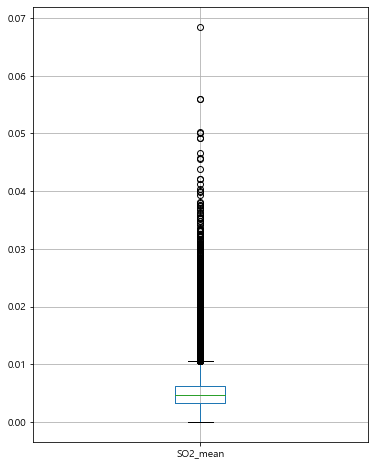

In [247]:
plt.figure(figsize=(6,8))
patient_final_0121[['SO2_mean']].boxplot()

#### air_out_idx 116 확인

In [ ]:
patient_final = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\patient_final.csv', encoding = 'euc-kr')
patient_final

In [ ]:
patient_final.loc[patient_final['air_out_idx'] == 116]

In [ ]:
idx.loc[idx['OBJECTID(air_out_idx)'] == 116]

In [ ]:
patient_final['P_ADD_CITY_DIST'].unique()